In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}table{margin-left: 0 !important;}</style>")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter, drange
import seaborn as sns

# Team Member Names

|Name |
|:--------|
|Sabrina Purvis |
|Brian Gaither |
|Aurian Ghaemmaghami |
|Andrew Larsen |

# Business Understanding

The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability, crime conditions and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  
  
As you will see below, we can find meaningful clusters in time of day, day of week, day of month and possibly even season with relation to crime counts and locations.  
 
We are exploring two specific aims with this dataset:
- Approach 1:  Start with an aggregated version of the data to get count of crimes per day and 1) Cluster based on number of crimes per day, as well as various factors that could affect this number, and 2) cluster only using the aggregated crime conditions (not crimes per day)
- Approach 2: Cluster based on attributes of the crime incidents to analyze crime profiles.

Our definition of a successful cluster analysis is one that is able to provide actionable insights and intel.  We hope that being able to cluster types of crimes will allow practical application around policing. 

We plan to use inertia and silhouette score in order to score our clustering algorithms. Inertia, also known as within cluster sum-of-squares or distortion, is a good method of determining how many clusters one should have. This metric tells us how far each point is from the nearest cluster, and a lower inertia is better. In short, inertia will tell us how far, on average, each point is from its nearest cluster. 

Silhouette score is a score between -1 and +1 that allows us to compare how good each clustering algorithm is. Silhouette score is defined as (b - a) / max(a, b), where a is the mean intra-cluster distance, and b is the mean nearest-cluster distance. Nearest-cluster distance meaning how far a sample is from the nearest cluster that it is not apart of, while intra-cluster distance is how far a sample is from the cluster that it is a part of. In short, Silhouette Score will tell us how segmented the clusters are. A good clustering algorithm will have a Silhouette Score greater than 0, as this would mean that clusters are not overlapping. 

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.



<a id="top"></a>
## Contents
* <a href="#Approach1">Approach 1</a>
    * <a href="#App1ModEval1">Modeling and Evaluation 1</a>
        * <a href="#App1ModEval1DU">Data Understanding</a>
        * <a href="#App1ModEval1Cluster">Cluster Analysis</a>
        * <a href="#App1ModEval1Effectiveness">Measuring Effectiveness</a>
    * <a href="#App1ModEval2">Modeling and Evaluation 2</a>
        * <a href="#App1ModEval2DU">Data Understanding</a>
        * <a href="#App1ModEval2Cluster">Cluster Analysis</a>
        * <a href="#App1ModEval2Effectiveness">Measuring Effectiveness</a>
    * <a href="#App1Compare">Approach 1 - Comparing Method 1 and 2</a>
* <a href="#Approach2">Approach 2</a>
    * <a href="#App2ModEval1">Modeling and Evaluation 1</a>
        * <a href="#App2ModEval1DU">Data Understanding</a>
        * <a href="#App2ModEval1Cluster">Cluster Analysis</a>
        * <a href="#App2ModEval1Effectiveness">Measuring Effectiveness</a>
    * <a href="#App2ModEval2">Modeling and Evaluation 2</a>
        * <a href="#App2ModEval2DU">Data Understanding</a>
        * <a href="#App2ModEval2Cluster">Cluster Analysis</a>
        * <a href="#App2ModEval2Effectiveness">Measuring Effectiveness</a>
    * <a href="#App2Compare">Approach 2 - Comparing Method 1 and 2</a>
* <a href="#Deploy">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>


<a id="Approach1"></a>
<a href="#top">Back to Top</a>
# Approach 1

<a id="App1ModEval1"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 1

<a id="App1ModEval1DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

The point of this analysis is to cluster based on the variables that were used in our KNN model in lab 2. KNN regression and K-means are similar in that they use the distance between points to reach their desired goal. We hope that applying K-means clustering on the same variables will aid in our analysis of our KNN regression model.

These are the variables that we will use in our first clustering model. Here are descriptions of the variables below:  

|Variable Label|Variable Type|Data Description|  
| :-|:-|:-|  
|count_cmplnt|Numeric|	Number of crimes per day per time of day per GeoCell. Our target variable|  
|Day|Numeric|Day of the month from 1 to 31|  
|Year|Numeric|The year, either 2014 or 2015|  
|GeoCell|Numeric|The GeoCell that the crime occurred in. We split New York City into 100 GeoCells and used the latitude and longitude of the crime to determine which GeoCell the crime was located in.|  
|PRCP|Numeric|Amount of precipitation on the day the crimes occurred, in inches|  
|SNOW|Numeric|Amount of snow on the day the crimes occurred, in inches|  
|TMIN|Numeric|	The maximum temperature on the day the crimes occurred, in Fahrenheit|  
|TMAX|Numeric|	The minimum temperature on the day the crimes occurred, in Fahrenheit|  
|Population|Numeric| Population of the borough in which the GeoCell is located|  
|is_Holiday|Binary| 1 if the day in question was a holiday, 0 if not|  
|is_Event|Binary|	1 if the day in question had a major event, 0 if not|  
|DayOfWeek|Numeric|	The day of the week. 0 for Monday, 1 for Tuesday etc. |  
|Month_No|Numeric|	The month. 1 for January, 2 for February etc. |  
|Daytime_Day|Binary| 1 signifies if the count_cmplnt variable is related to crimes between 10:00am and 2:00pm, 0 if not|  
|Daytime_Early Morning|Binary|1 signifies if the count_cmplnt variable is related to crimes between 2:00am and 6:00am, 0 if not|  
|Daytime_Evening|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 2:00pm and 6:00pm, 0 if not|  
|Daytime_Late Night|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 10:00pm and 2:00am, 0 if not|  
|Daytime_Morning|Binary|1 signifies if the count_cmplnt variable is related to crimes between 6:00am and 10:00am, 0 if not|  
|Daytime_Night|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 6:00pm and 10:00pm, 0 if not|  


Here, we read in the data and parse the CMPLNT_FR_DT variable as datetime.

In [3]:
df = pd.read_csv('/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/Lab2_Daily_Crime_Volume_Data/Training_and_Test_Set.csv',
                parse_dates = ['CMPLNT_FR_DT'])

As you can see below, there are many variables that are non-numeric. K-means clustering accepts only numeric variables, so we must do some pre-processing in order to use these variables in our model.

In [12]:
df.head(10)

CMPLNT_FR_DT     Daytime   Day_Name      Month   Day    Year  Season  \
0   2014-11-26     Morning  Wednesday   November  26.0  2014.0    Fall   
1   2014-12-01  Late Night     Monday   December   1.0  2014.0  Winter   
2   2015-11-10     Morning    Tuesday   November  10.0  2015.0    Fall   
3   2014-02-04     Morning    Tuesday   February   4.0  2014.0  Winter   
4   2015-08-25  Late Night    Tuesday     August  25.0  2015.0  Summer   
5   2014-09-03     Morning  Wednesday  September   3.0  2014.0    Fall   
6   2015-09-17     Morning   Thursday  September  17.0  2015.0    Fall   
7   2015-01-29     Morning   Thursday    January  29.0  2015.0  Winter   
8   2015-03-12     Evening   Thursday      March  12.0  2015.0  Spring   
9   2014-06-23  Late Night     Monday       June  23.0  2014.0  Summer   

   GeoCell        BORO_NM  PRCP  ...  TMIN  TMAX  Population PC_INCOME  \
0     66.0         QUEENS  1.24  ...    34    51   2,250,002     40997   
1     60.0         QUEENS  0.09  ...    42    65   2,250,002     40997   
2     15.0       BROOKLYN  0.26  ...    51    57   2,552,911     43915   
3     48.0         QUEENS  0.00  ...    22    35   2,250,002     40997   
4     35.0       BROOKLYN  0.00  ...    73    90   2,552,911     43915   
5     23.0  STATEN ISLAND  0.00  ...    72    86     468,730     48123   
6     49.0         QUEENS  0.00  ...    68    89   2,250,002     44031   
7     35.0       BROOKLYN  0.02  ...    19    36   2,552,911     43915   
8     67.0         QUEENS  0.00  ...    36    47   2,250,002     44031   
9     48.0         QUEENS  0.00  ...    65    81   2,250,002     40997   

   Hm_Sls_Price_Range Holiday               Event is_Holiday  is_Event  \
0              Medium     NaN                 NaN          0         0   
1              Medium     NaN                 NaN          0         0   
2                High     NaN                 NaN          0         0   
3              Medium     NaN                 NaN          0         0   
4                High     NaN                 NaN          0         0   
5                 Low     NaN      US Open Tennis          0         1   
6              Medium     NaN  New York Boat Show          0         1   
7                High     NaN                 NaN          0         0   
8              Medium     NaN                 NaN          0         0   
9              Medium     NaN                 NaN          0         0   

   count_cmplnt  
0             1  
1             1  
2             2  
3             3  
4             1  
5             1  
6             7  
7             5  
8             1  
9             3  

[10 rows x 21 columns]

Our Day_Name variable was built off of the CMPLNT_FR_DT variable. In order to turn that variable into a numeric variable, we simply use the dt.dayofweek function from pandas in order to change "Monday" to 0, "Tuesday" to 1 etc. 

In [5]:
df['DayOfWeek'] = df['CMPLNT_FR_DT'].dt.dayofweek

Similar to the dayofweek function, dt.month turns January into 1, February into 2, etc. We use this function to change our Month variable into a numeric variable. 

In [6]:
df['Month_No'] = df['CMPLNT_FR_DT'].dt.month
df_Crime = df

As you can see in the plot below, there does seem to be a temporal dependence of number of crimes. Crimes seem to peak in the summer and drop in the winter. We encode this temporal dependence as numeric variables identifying the month, the year and the day. There may be a couple of outliers on the high end of number of crimes, but none that are concerning.

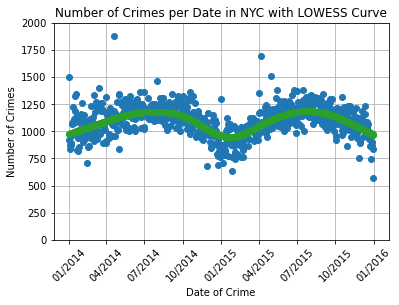

In [15]:
df_Crime['CMPLNT_FR_DT'] = pd.to_datetime(df_Crime['CMPLNT_FR_DT'], format = '%m/%d/%Y')
crimeByDate = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Date of Crime')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.ylim(-5, 2000)
plt.title('Number of Crimes per Date in NYC with LOWESS Curve')
plt.plot_date(crimeByDate['CMPLNT_FR_DT'], crimeByDate['count_cmplnt'])
plt.plot_date(crimeByDate['CMPLNT_FR_DT'],lowess(crimeByDate['count_cmplnt'],crimeByDate['CMPLNT_FR_DT'], frac = .25))
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))
plt.show()

As you can see in the plot below, there does seem to be a dependence of number of crimes on the burough. Borough is categorical, but we have 3 numeric variables that correspond to the borough: Population, Hm_Sls_Price_Range and PC_INCOME, so we only need one of these variables in our final model. The population variable was chosen due to the ease of turning this variable into numeric, though we could have used any other variable listed above. 

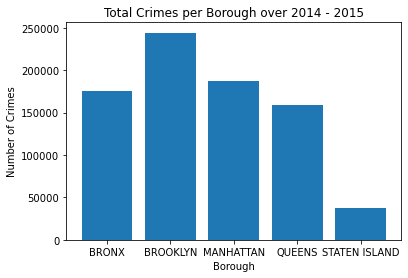

In [16]:
borodf = df_Crime.groupby('BORO_NM')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Borough over 2014 - 2015')
plt.bar(borodf['BORO_NM'], borodf['count_cmplnt']);

The time of day does look to have some influence on the number of crimes as well, with evening and day time seeming to have the most crimes, although morning and night have the 4 largest count_cmplnts. There are some outliers here, as most of the occurances have less than 10 crimes. That isn't a mistake, but it is important to keep in mind that this variable is right skewed

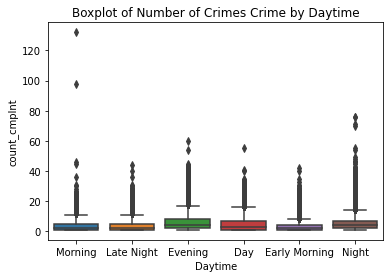

In [17]:
ax = sns.boxplot(x="Daytime", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Daytime");

Below is a graph of the total crimes per day of the week over 2014 - 2015. The most crimes occur on Friday, and the fewest crimes occur on Sunday. There isn't a large difference between the individual days of the week, but there may be enough difference between Friday and Sunday to have an impact on our models. 

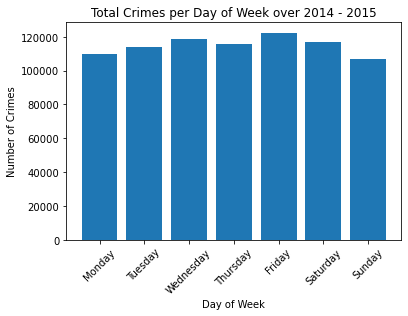

In [18]:
dowdf = df_Crime.groupby('DayOfWeek')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Day of Week over 2014 - 2015')
plt.bar(dowdf['DayOfWeek'], dowdf['count_cmplnt']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

In order to bring the latitude and longitude into the grouped analysis, we created 100 GeoCells to bin the locations of crimes. When we plot the number of crimes by location, we find a large difference between the 100 geocells. GeoCell number 87 has a two year crime count of 48,434, while many of these GeoCells have no crime at all. Crime count has a large dependence on location. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

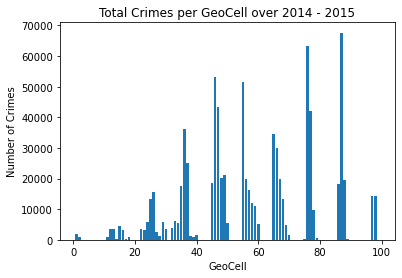

In [19]:
locdf = df_Crime.groupby('GeoCell')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('GeoCell')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per GeoCell over 2014 - 2015')
plt.bar(locdf['GeoCell'], locdf['count_cmplnt']);

When we look at the number of crimes per day vs. the daily high temperature, we can see that crime seems to increase lineraly as temperature increases. This seems to confirm what we saw in the plot of crimes per month: the colder winter months have lower amounts of crime, while the warmer summer months have larger amounts of crime. 

<ipython-input-20-12e0611d08f5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_df = df_Crime.groupby('CMPLNT_FR_DT')['TMAX','TMIN', 'SNOW', 'PRCP'].max();


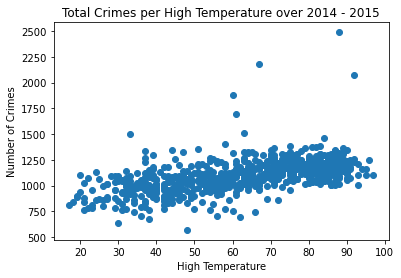

In [20]:
datedf = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
temp_df = df_Crime.groupby('CMPLNT_FR_DT')['TMAX','TMIN', 'SNOW', 'PRCP'].max();
tempdf = datedf.join(temp_df, on = 'CMPLNT_FR_DT');
fig, ax = plt.subplots()
plt.scatter(tempdf['TMAX'], tempdf['count_cmplnt']);
plt.xlabel('High Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per High Temperature over 2014 - 2015');

The daily low temperature is highly correlated with the daily high temperature, so the plot of low temperature vs. number of crimes is nearly identical to the high temperature vs. number of crimes. Both were included in the KNN model due to potential extreme fluxuations in temperature in New York City. 

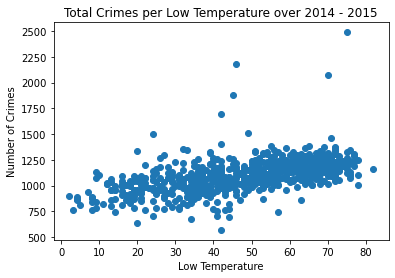

In [21]:
fig, ax = plt.subplots()
plt.scatter(tempdf['TMIN'], tempdf['count_cmplnt'])
plt.xlabel('Low Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Low Temperature over 2014 - 2015');

Here, we look at the amount of snow vs. the crime count. It does not snow very often in New York so it is hard to tell if there is a trend with so few data points, but number of crimes does seem to have a negative linear dependence on the amount of snow that New York recieves.

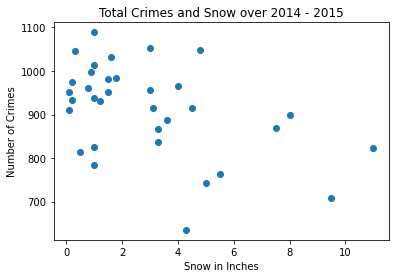

In [22]:
snowdf = tempdf[tempdf['SNOW'] > 0]
fig, ax = plt.subplots()

plt.scatter(snowdf['SNOW'], snowdf['count_cmplnt'])
plt.xlabel('Snow in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Snow over 2014 - 2015');

Here, we look at the amount of daily rain that New York recieved vs. the number of crimes that day. Removing days where there was no rain, there may be a slight negative trend.

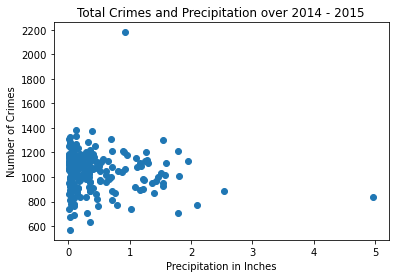

In [23]:
prcpdf = tempdf[tempdf['PRCP'] > 0]
fig, ax = plt.subplots()
plt.scatter(prcpdf['PRCP'], prcpdf['count_cmplnt'])
plt.xlabel('Precipitation in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Precipitation over 2014 - 2015');

There isn't a lot to visually separate holidays from non-holidays as far as crime count goes, but we are going to keep it in the model as that could be due to the relatively large outliers.  

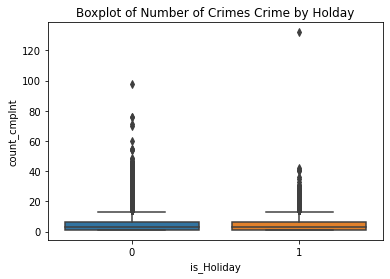

In [24]:
ax = sns.boxplot(x="is_Holiday", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Holday");

Similar to holiday, there isn't a lot to visually separate events from non-events as far as crime count goes, but we are going to keep it in the model as that could be due to the relatively large outliers.  

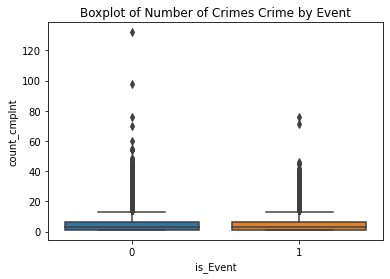

In [25]:
ax = sns.boxplot(x="is_Event", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Event");

Below we remove commas and turn Population into a numeric variable. 

In [7]:
df['Population'] = pd.to_numeric(df['Population'].str.replace(',','', regex = False))

Here, we drop the variables that are non-numeric and have been represented in numeric in a different variable. The only variable that hadn't been transformed into numeric was the daytime variable, which was one-hot-encoded using the get_dummies function, which automatically one-hot-encodes then drops the categorical variables remaining in the dataframe.

In [8]:
Clusterdf = df.drop(['Holiday', 'Event', 'Day_Name', 'Month', 'BORO_NM', 'PC_INCOME','Hm_Sls_Price_Range', 'Season', 'CMPLNT_FR_DT'], axis = 1)
Clusterdf = pd.get_dummies(Clusterdf)

As you can see below, all variables are now numeric.

In [9]:
Clusterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170650 entries, 0 to 170649
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Day                    170650 non-null  float64
 1   Year                   170650 non-null  float64
 2   GeoCell                170650 non-null  float64
 3   PRCP                   170650 non-null  float64
 4   SNOW                   170650 non-null  float64
 5   TMIN                   170650 non-null  int64  
 6   TMAX                   170650 non-null  int64  
 7   Population             170650 non-null  int64  
 8   is_Holiday             170650 non-null  int64  
 9   is_Event               170650 non-null  int64  
 10  count_cmplnt           170650 non-null  int64  
 11  DayOfWeek              170650 non-null  int64  
 12  Month_No               170650 non-null  int64  
 13  Daytime_Day            170650 non-null  uint8  
 14  Daytime_Early Morning  170650 non-nu

And, as you can see below, none of our remaining variables contain any NA values. 

In [10]:
Clusterdf.isna().sum()

Day                      0
Year                     0
GeoCell                  0
PRCP                     0
SNOW                     0
TMIN                     0
TMAX                     0
Population               0
is_Holiday               0
is_Event                 0
count_cmplnt             0
DayOfWeek                0
Month_No                 0
Daytime_Day              0
Daytime_Early Morning    0
Daytime_Evening          0
Daytime_Late Night       0
Daytime_Morning          0
Daytime_Night            0
dtype: int64

Here, we scale our data. The standard scaler uses the formula z = (x - u) / s, where x is the value of the variable, s is the standard deviation and u is the mean, to calculate the transformation, z, of the variable. This scaling was chosen since it allows for outliers to still be outliers and allows the data to keep its distribution, while making sure that all variables are using the standard deviation as "distance." This allows for the scale of the variables to all be the same, which is extremely important in a K-means model. A single variable with an extremely large scale would dominate variable importance if we did not scale.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaleFit = scaler.fit(Clusterdf)
X_cluster = scaleFit.transform(Clusterdf)

<a id="App1ModEval1Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

Initially, we explored running agglomerative clustering and DBSCAN, but our computational power and memory were not enough to use those methods on our dataset. Instead of using a subset, we decided to use K-Means instead. We decided to use k-means++ in order to initialize the model, as k-means++ often leads to better clusters and converges faster. We run the algorithm 50 times each for k = 2 through k = 100. Our maximum number of iterations that we allowed the k-means algorithm to run for was 1000. 50 and 1000 were chosen as we thought that would be large enough to provide us with stable estimates of our clusters. 

In [32]:
from sklearn.cluster import KMeans
inertiaList = []
for i in range(2,101):
    cluster = KMeans(n_clusters = i, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
    results = cluster.fit(X_cluster)
    inertiaList.append(results.inertia_)

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

As you can see below, our plot of error vs. number of k's has an elbow between 0 and 20.

Text(0, 0.5, 'Inertia')

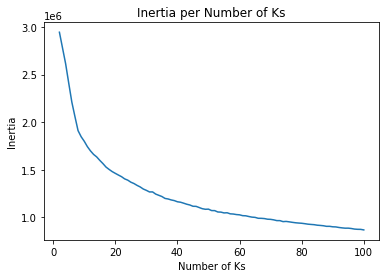

In [34]:
plt.plot(range(2,101), inertiaList);
plt.title('Inertia per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Inertia')

We zoom between 2 and 18, and find that there's a pretty clear break at k = 8. 

Text(0, 0.5, 'Inertia')

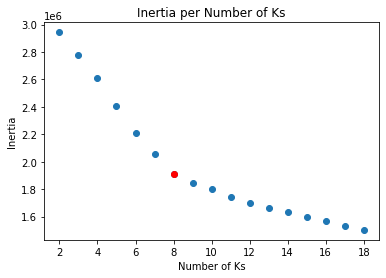

In [35]:
plt.scatter(range(2,19), inertiaList[0:17])
plt.plot(8, inertiaList[6], marker = 'o', color = 'red')
plt.title('Inertia per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Inertia')

Here, we run a for loop to determine the silhouette score for our clusters. We run this from K = 2 to K = 20 as we determined using intertia that the best number of clusters is likely between 2 and 20. 

In [50]:
from sklearn.cluster import KMeans
inertiaList = []
silhouette_list = []
for i in range(2,21):
    cluster = KMeans(n_clusters = i, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
    results2 = cluster.fit(X_cluster)
    inertiaList.append(results.inertia_)
    silhouette_list.append(silhouette_score(Clusterdf, results2.labels_))

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

Below, we plot Silhouette Score vs. Number of K's. Silhouette score is a method of determining how good clusters are, with 1 being the best and -1 being the worst. For all K's between 2 and 18, you can see we have a negative silhouette score. Silhouette score is maximized at K = 2, and flattens out from k = 6 to K = 11. Since K = 2, 3, 4, and 5 all had such high inertias, using K = 8 is appropriate. 

Text(0, 0.5, 'Silhouette Score')

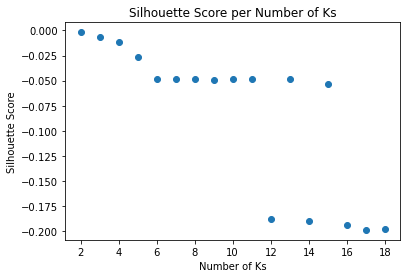

In [53]:
plt.scatter(range(2,19), silhouette_list[0:17])
plt.title('Silhouette Score per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Silhouette Score')

Here, we run the K-Means algorithm with k = 8 on our full dataframe. The result will give us 8 clusters to analyze. 

In [8]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 8, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
results = cluster.fit(X_cluster)

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Here, we add the cluster that each data point was assigned to to the end of the dataframe for ease of analysis. 

In [9]:
Clusterdf['cluster'] = results.labels_

In [38]:
Clusterdf.head()

Day    Year  GeoCell  PRCP  SNOW  TMIN  TMAX  Population  is_Holiday  \
0  26.0  2014.0     66.0  1.24   0.2    34    51     2250002           0   
1   1.0  2014.0     60.0  0.09   0.0    42    65     2250002           0   
2  10.0  2015.0     15.0  0.26   0.0    51    57     2552911           0   
3   4.0  2014.0     48.0  0.00   0.0    22    35     2250002           0   
4  25.0  2015.0     35.0  0.00   0.0    73    90     2552911           0   

   is_Event  count_cmplnt  DayOfWeek  Month_No  Daytime_Day  \
0         0             1          2        11            0   
1         0             1          0        12            0   
2         0             2          1        11            0   
3         0             3          1         2            0   
4         0             1          1         8            0   

   Daytime_Early Morning  Daytime_Evening  Daytime_Late Night  \
0                      0                0                   0   
1                      0                0                   1   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   1   

   Daytime_Morning  Daytime_Night  cluster  
0                1              0        3  
1                0              0        1  
2                1              0        3  
3                1              0        3  
4                0              0        1

Below, we create a pair plot with the cluster variable colored. There's a lot going on here, so we'll dig deeper into the pair plots that show separation between clusters. 

/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

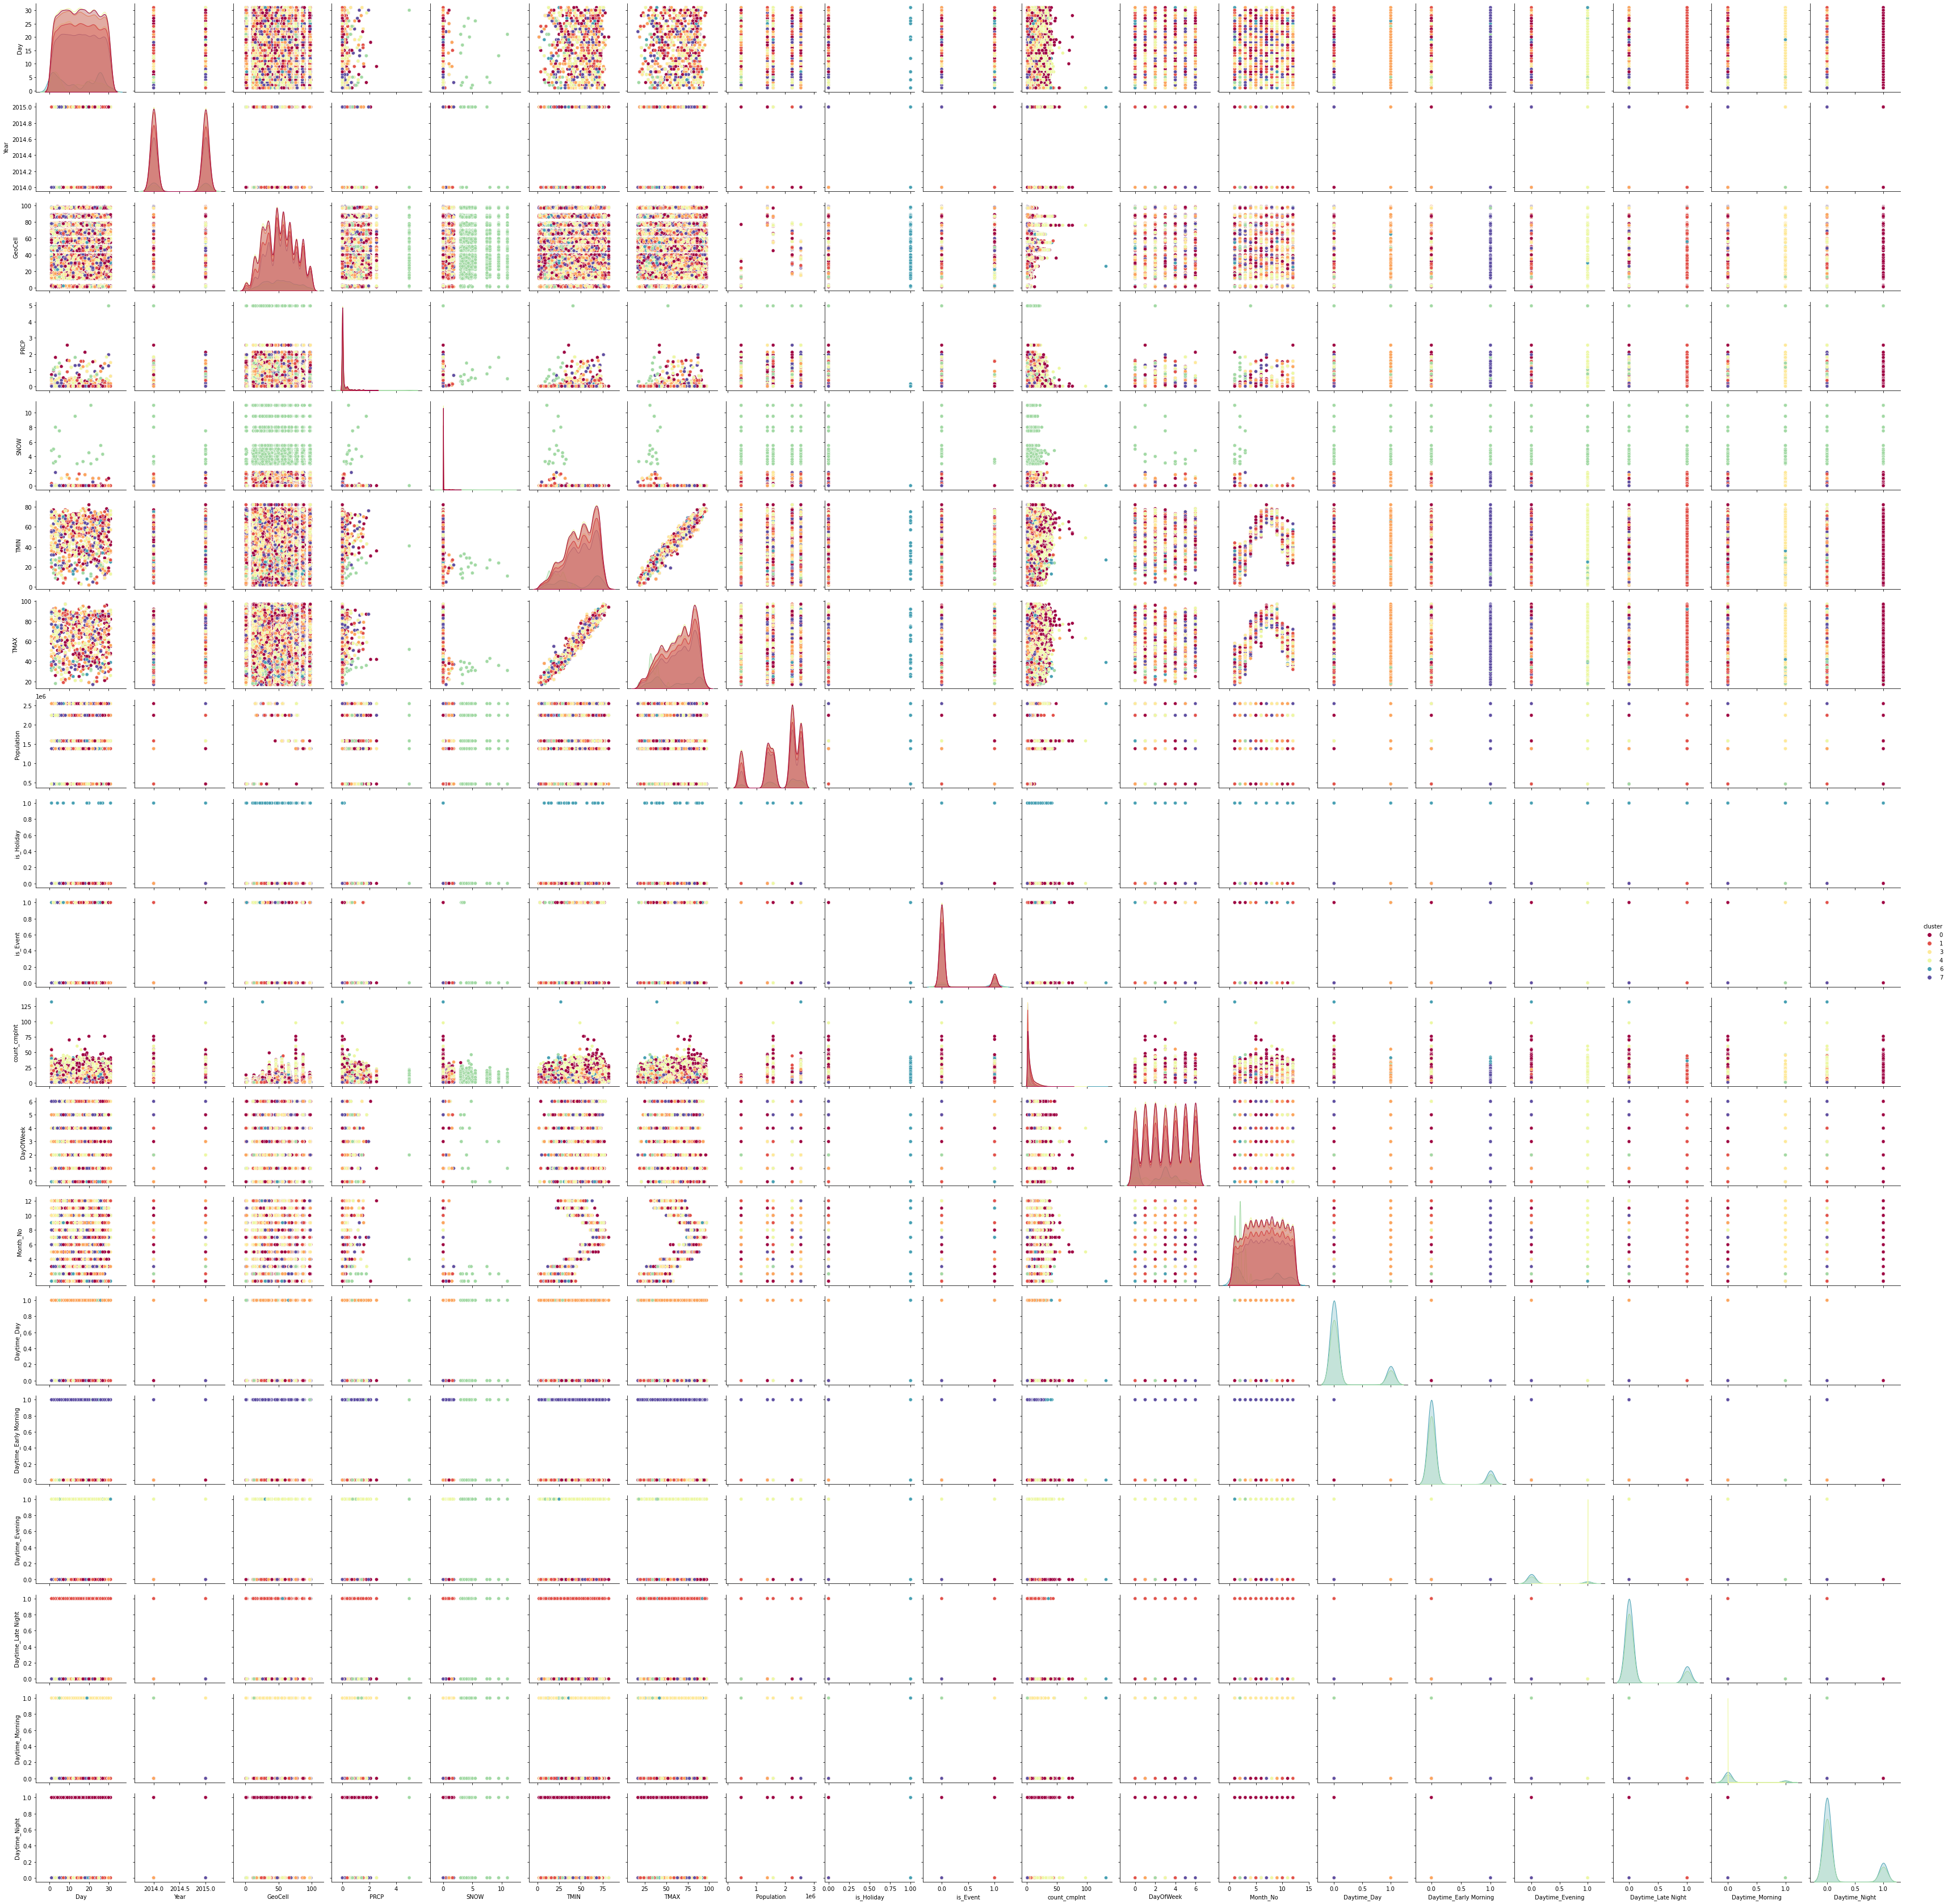

In [39]:
sns.pairplot(Clusterdf, hue = 'cluster', palette = 'Spectral')

Cluster 7 seems to be digging out the "is_Holiday" variable.

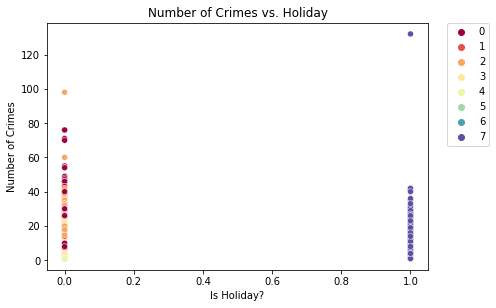

In [28]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'is_Holiday', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Holiday')
plt.xlabel('Is Holiday?')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


Daytime_Day seems to determine cluster 3, with some outliers. 

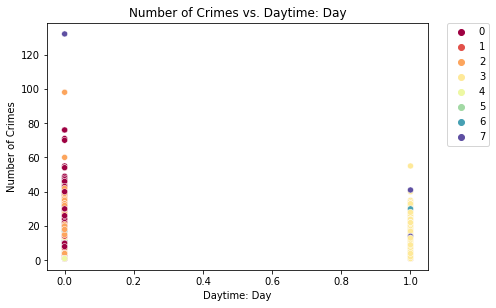

In [29]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Day', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Day')
plt.xlabel('Daytime: Day')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Early Morning seems to determine cluster 4, with some outliers

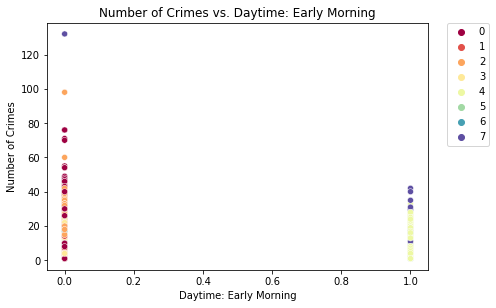

In [30]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Early Morning', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Early Morning')
plt.xlabel('Daytime: Early Morning')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Evening seems to determine the 2nd cluster. 

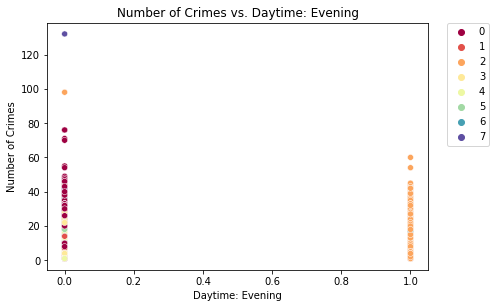

In [31]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Evening', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Evening')
plt.xlabel('Daytime: Evening')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Late Night seems to determine the 1st cluster, with some outliers. 

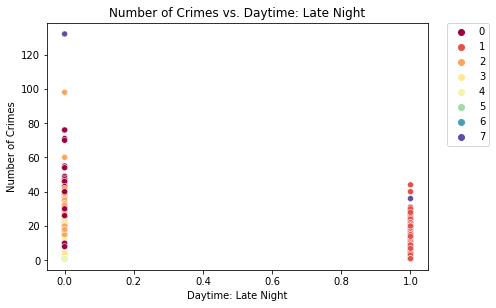

In [32]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Late Night', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Late Night')
plt.xlabel('Daytime: Late Night')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Morning seems to determine the 5th cluster, with some outliers. 

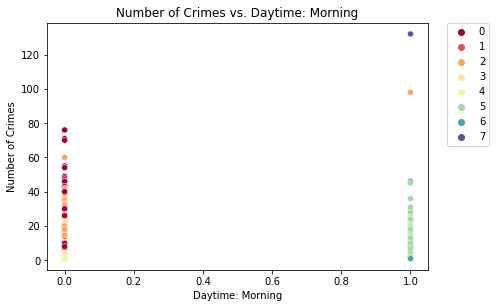

In [33]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Morning', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Morning')
plt.xlabel('Daytime: Morning')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Night seems to determine the 0th cluster, with some outliers.

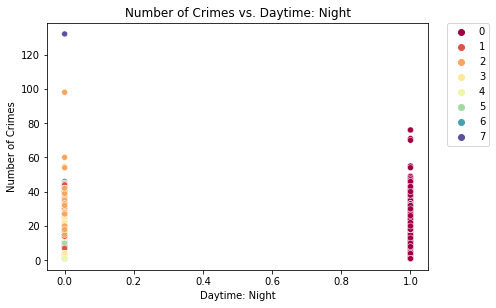

In [34]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Night', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Night')
plt.xlabel('Daytime: Night')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

SNOW seems to determine the 6th cluster. 

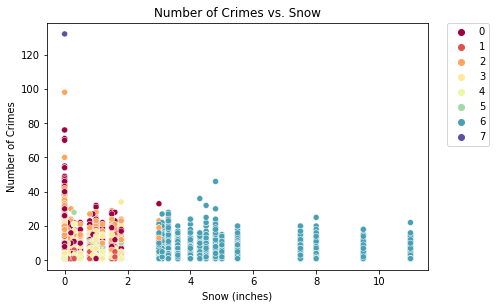

In [35]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'SNOW', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Snow')
plt.xlabel('Snow (inches)')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

The above plots are confirmed by looking at the grouped data below. 
- 100% of cluster 0 has Daytime_Night
- 100% of cluster 1 has Daytime_Late Night
- Almost 100% of cluster 2 has Daytime_Evening
- 100% of cluster 3 has Daytime_Day
- 100% of cluster 4 has Daytime_Early Morning
- 100% of cluster 5 has Daytime_Morning
- Cluster 6 seems to center around very cold, snowy days
- Cluster 7 is the only cluster with any "is_Holiday" = 1. 

There isn't a really compelling story to be told here: the daytime variable, is_Holiday variable and SNOW variable cause the largest separation in the data. This would have been useful information to know prior to our modelling, especially for our KNN model, but this isn't terribly useful data to present to a client. 

In [36]:
Clusterdf.groupby(Clusterdf['cluster']).mean()

Day         Year    GeoCell      PRCP      SNOW       TMIN  \
cluster                                                                     
0        15.786551  2014.497268  51.867224  0.120320  0.022510  49.574452   
1        15.782666  2014.493934  53.544887  0.118400  0.025401  49.823873   
2        15.756496  2014.496610  51.402381  0.119406  0.022414  49.493561   
3        15.725445  2014.497598  51.948251  0.119662  0.021143  49.536402   
4        15.765197  2014.500327  55.377953  0.117707  0.024181  49.801008   
5        15.673300  2014.496853  53.352387  0.121297  0.025261  49.478985   
6        12.466092  2014.580607  53.221297  0.685407  5.268917  20.809042   
7        14.055798  2014.488666  52.791412  0.012851  0.000000  45.953575   

              TMAX    Population  is_Holiday  is_Event  count_cmplnt  \
cluster                                                                
0        64.322494  1.844535e+06         0.0  0.137845      5.870680   
1        64.580486  1.873659e+06         0.0  0.140527      3.802951   
2        64.242304  1.841294e+06         0.0  0.137176      6.084044   
3        64.303001  1.849669e+06         0.0  0.136851      5.030321   
4        64.573490  1.910531e+06         0.0  0.140629      3.185358   
5        64.224459  1.877745e+06         0.0  0.133870      3.647183   
6        33.454491  1.873401e+06         0.0  0.259072      3.936347   
7        60.202267  1.868436e+06         1.0  0.565824      4.474717   

         Daytime_Day  Daytime_Early Morning  Daytime_Evening  \
cluster                                                        
0           0.000000               0.000000         0.000000   
1           0.000000               0.000000         0.000000   
2           0.000000               0.000000         0.999968   
3           1.000000               0.000000         0.000000   
4           0.000000               1.000000         0.000000   
5           0.000000               0.000000         0.000000   
6           0.184414               0.125818         0.198691   
7           0.180471               0.138405         0.181125   

         Daytime_Late Night  Daytime_Morning  Daytime_Night  
cluster                                                      
0                  0.000000         0.000000       1.000000  
1                  1.000000         0.000000       0.000000  
2                  0.000000         0.000032       0.000000  
3                  0.000000         0.000000       0.000000  
4                  0.000000         0.000000       0.000000  
5                  0.000000         1.000000       0.000000  
6                  0.141880         0.152290       0.196907  
7                  0.164996         0.150828       0.184176

### Summary for Approach 1 Method 1

The following lists the key data that appears to describe each cluster distinctly:

|Cluster|Variable|Notes|  
| :-|:-|:-|  
|Cluster 0 |Daytime_Night| Note: No Daytime variables have an absolutely clean split into a certain cluster. |  
|Cluster 1 |Daytime_Late Night|  |  
|Cluster 2 |Daytime_Evening| |  
|Cluster 3 |Daytime_Day | |  
|Cluster 4 |Daytime_Early Morning| |  
|Cluster 5 |Daytime_Morning  | Typically, lower temperature days as well |  
|Cluster 6 |SNOW |	|  
|Cluster 7 |is_Holiday | The only cluster with any "is_Holiday" = 1 |  



<a id="App1ModEval1Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

See the silhouette score of our final model below. The negative score says that our clusters are overlapping, and thus aren't good. These clusters are probably not helpful for any client, but they would have been extremely useful prior to running our KNN model. This data is the exact same data that we fed into our KNN model, and the main separators that the clusters seem to have dug out were the daytime variable, the snow variable and the is_Holiday variable. These variables create the largest separators, and thus create the clusters. Knowing the variables that create the largest separations is key for KNN, as KNN also uses distance to calculate how similar two points are. The clustering algorithm is telling us that the variables that create the most similarity are the daytime, is_Holiday and SNOW variables. Knowing this prior to modelling would have aided in our analysis.

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(Clusterdf, results.labels_)

-0.04854761882131042

<a id="App1ModEval2"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 2

<a id="App1ModEval2DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

Method 2 described below is a slightly different approach to apply clustering to our crime dataset.  Specifically, we will use crime condition information to identify different patterns in terms of when crimes take place and what the weather conditions are. From these patterns, we will then generalize and explain the meaning behind the clusters we identify.  

In this evaluation, we use a subset of features of those used in Modeling and Evaluation 1. The features below were specifically chosen to avoid location specific features and only leaving crime condition features as listed below.

|Feature | Description |
|:-------|:------------|
|Daytime | This specifies the general time of day a crime occurred.  i.e. Early Morning, Morning, Day, Evening, Late Evening, Night |
|Day_Name | The weekday name in which a crime occurred |
|Month | The month in which a crime occurred |
|Season | The season in which a crime occurred.  i.e. Winter, Spring, Summer, Fall |
|is_Holiday | Indicates if there was a holiday on the day in which a crime occurred (Boolean 1 = Holiday) |
|is_Event | Indicates if there was an event held in the city on the day a crime occurred (Boolean 1 = Event) |
|PRCP | The amount of precipitation in inches on the day a crime occurred |
|SNOW | The amount of snow in inches on the day a crime occurred |
|TMIN | The minimum temperature in Fahrenheit on the day a crime occurred |
|TMAX | The maximum temperature in Fahrenheit on the day a crime occurred |


With the fields above, we will be able to identify how the records in our dataset cluster and determine the mode of the string features and the average of the continuous features to arrive at a general description.

In [6]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df_Crime = pd.read_csv(file_path)

In [7]:
df_Crime.head(5)

CMPLNT_FR_DT Daytime   Day_Name    Month  Day    Year  Season  GeoCell  \
0     1/1/2014     Day  Wednesday  January  1.0  2014.0  Winter     15.0   
1     1/1/2014     Day  Wednesday  January  1.0  2014.0  Winter     16.0   
2     1/1/2014     Day  Wednesday  January  1.0  2014.0  Winter     25.0   
3     1/1/2014     Day  Wednesday  January  1.0  2014.0  Winter     26.0   
4     1/1/2014     Day  Wednesday  January  1.0  2014.0  Winter     34.0   

    BORO_NM  count_cmplnt  ...  SNOW  TMIN  TMAX  Population PC_INCOME  \
0  BROOKLYN             1  ...   0.0    24    33   2,552,911     41399   
1  BROOKLYN             4  ...   0.0    24    33   2,552,911     41399   
2  BROOKLYN             7  ...   0.0    24    33   2,552,911     41399   
3  BROOKLYN             2  ...   0.0    24    33   2,552,911     41399   
4  BROOKLYN             1  ...   0.0    24    33   2,552,911     41399   

   Hm_Sls_Price_Range         Holiday               Event is_Holiday  is_Event  
0                High  New Year's Day  New York Boat Show          1         1  
1                High  New Year's Day  New York Boat Show          1         1  
2                High  New Year's Day  New York Boat Show          1         1  
3                High  New Year's Day  New York Boat Show          1         1  
4                High  New Year's Day  New York Boat Show          1         1  

[5 rows x 21 columns]

### Data Processing

We one hot encode the categorical variables.   

|Feature |
|:-------|
|Daytime |
|Day_Name |
|Month |
|Season |


In [9]:
#one hot encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season']
columns_no_change = ['is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX']

df_existing = df_Crime[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(df_Crime[columns_to_encode])

#concatenate processed columns back together for X
df_Crime = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(df_Crime)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
df_Crime = df1


We scale the continuous variables so that we can better calculate distance when clustering.


|Feature |
|:-------|
|PRCP |
|SNOW |
|TMIN |
|TMAX |

In [10]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_scale = ['PRCP','SNOW','TMIN','TMAX']
#get a list of all columns without the columns to scale above
lstCols = df_Crime.columns.values.tolist()
lstCols.remove('PRCP')
lstCols.remove('SNOW')
lstCols.remove('TMIN')
lstCols.remove('TMAX')
columns_no_change = lstCols

df_existing = df_Crime[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(df_Crime[columns_to_scale])

#concatenate processed columns back together for X_train
X_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
df_Crime = df1

Below is the resulting data after pre-processing steps have been performed

In [8]:
df_Crime.head()

PRCP     SNOW      TMIN      TMAX  x0_Day  x0_Early Morning  \
0 -0.350032 -0.15313 -1.385995 -1.599525     1.0               0.0   
1 -0.350032 -0.15313 -1.385995 -1.599525     1.0               0.0   
2 -0.350032 -0.15313 -1.385995 -1.599525     1.0               0.0   
3 -0.350032 -0.15313 -1.385995 -1.599525     1.0               0.0   
4 -0.350032 -0.15313 -1.385995 -1.599525     1.0               0.0   

   x0_Evening  x0_Late Night  x0_Morning  x0_Night  ...  x2_May  x2_November  \
0         0.0            0.0         0.0       0.0  ...     0.0          0.0   
1         0.0            0.0         0.0       0.0  ...     0.0          0.0   
2         0.0            0.0         0.0       0.0  ...     0.0          0.0   
3         0.0            0.0         0.0       0.0  ...     0.0          0.0   
4         0.0            0.0         0.0       0.0  ...     0.0          0.0   

   x2_October  x2_September  x3_Fall  x3_Spring  x3_Summer  x3_Winter  \
0         0.0           0.0      0.0        0.0        0.0        1.0   
1         0.0           0.0      0.0        0.0        0.0        1.0   
2         0.0           0.0      0.0        0.0        0.0        1.0   
3         0.0           0.0      0.0        0.0        0.0        1.0   
4         0.0           0.0      0.0        0.0        0.0        1.0   

   is_Holiday  is_Event  
0         1.0       1.0  
1         1.0       1.0  
2         1.0       1.0  
3         1.0       1.0  
4         1.0       1.0  

[5 rows x 35 columns]

### PCA

We perform PCA to reduce dimensionality so that we can work with only 2-dimensions for visualizing and clustering

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principal_components = pca.fit_transform(df_Crime)

df_PCA = pd.DataFrame(data=principal_components,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])

We then generate a scree plot below to get a sense of how much variability in the dataset our new principle components explain.  we are able to explain 55% of the variability in the dataset with the first two principle components.

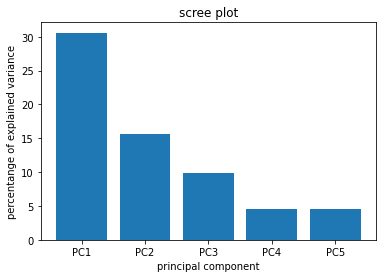

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

We then generate a scatterplot using the first two principle components.  The data does appear to have a few clusters. We'll analyze further below to see just how we'll be able to cluster the data.

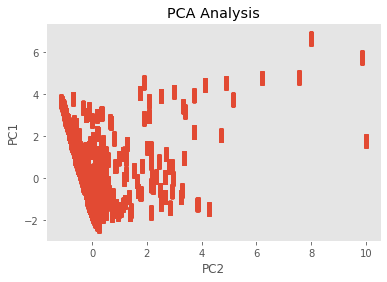

In [11]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X = df_PCA[['PC1','PC2']].values
plt.scatter(X[:,1], X[:,0]+np.random.random(X[:,1].shape)/2,
            s=20)

plt.xlabel('PC2'), plt.ylabel('PC1')
plt.grid()
plt.title('PCA Analysis')
plt.show()

<a id="App1ModEval2Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis


We start by looping through various k values and fitting a KMeans cluster using euclidean to determine the optimal k value.  Here, it appears that k=6 is optimal given that's where the curve begins to flatten out in the below elbow graph.

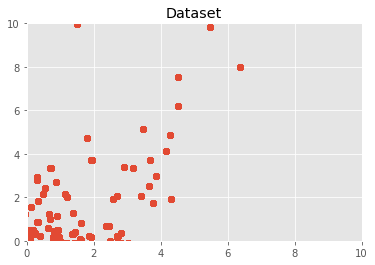

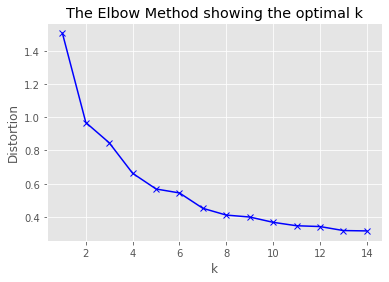

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

x1 = df_PCA[['PC1']].to_numpy()
x2 = df_PCA[['PC2']].to_numpy()

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o','v','s']

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
#get the first two principle components

X = df_PCA[['PC1','PC2']].values

Let's evaluate the optimal number of clusters for our data using the silhouette vs cluster size graph below.  It again appears that 6 clusters appears to be the optimal number of clusters as we can see the optimal Silhouette score using euclidean is highest at 6 clusters.

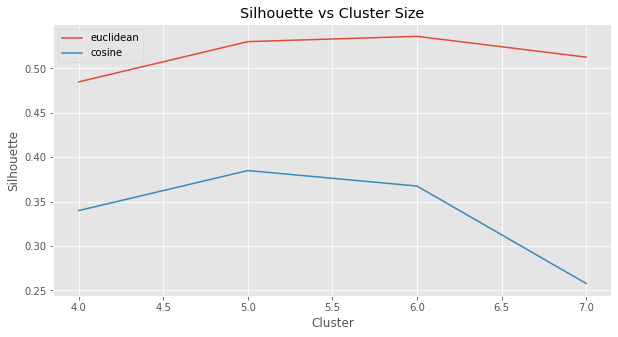

In [17]:
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(4,8)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(X, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

We then fit a k-means++ with n_clusters=6 based on our analysis above and plot the data again to see how the clusters are assigned.  It does appear that we are able to cluster and for the most part, the clusters do appear separable.

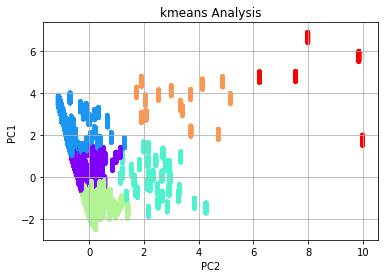

In [13]:
from sklearn.cluster import KMeans


cls = KMeans(n_clusters=6,init='k-means++',random_state=123)
cls.fit(X)

cluster_label = cls.labels_ #the labels from kmeans clustering

%matplotlib inline
plt.scatter(X[:,1], X[:,0]+np.random.random(X[:,1].shape)/2,
            c=cluster_label, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('PC2'), plt.ylabel('PC1')
plt.grid()
plt.title('kmeans Analysis')
plt.show()

###  Describing the Results

Now, we'll take our cluster labels and add them back to the original dataset so that we can begin to analyze the patterns that make up the different clusters.  This will allow us to describe what is different about the clusters.

In [15]:
#here we are going to get the cluster labels and then add them back to the original data to identify patterns in the clusters for explain-ability
#get cluster labels
df_cluster_labels = pd.DataFrame(cluster_label, columns=['cluster_id'])
#load original csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df = pd.read_csv(file_path)
#add cluster labels back to original data
df_withLabs = pd.concat([df,df_cluster_labels],axis=1)

In [16]:
df_withLabs = df_withLabs[['Daytime','Day_Name','Month','Season','is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX','cluster_id']]
df_withLabs.head(5)

Daytime   Day_Name    Month  Season  is_Holiday  is_Event  PRCP  SNOW  TMIN  \
0     Day  Wednesday  January  Winter           1         1   0.0   0.0    24   
1     Day  Wednesday  January  Winter           1         1   0.0   0.0    24   
2     Day  Wednesday  January  Winter           1         1   0.0   0.0    24   
3     Day  Wednesday  January  Winter           1         1   0.0   0.0    24   
4     Day  Wednesday  January  Winter           1         1   0.0   0.0    24   

   TMAX  cluster_id  
0    33           1  
1    33           1  
2    33           1  
3    33           1  
4    33           1

In [17]:
df_mode = df_withLabs.groupby(['cluster_id']).apply(pd.DataFrame.mode).reset_index(drop=True).drop(df_withLabs[['PRCP','SNOW','TMIN','TMAX']], axis=1)
df_mode

Daytime   Day_Name     Month  Season  is_Holiday  is_Event  cluster_id
0  Evening     Sunday     April  Spring           0         0           0
1  Evening  Wednesday   January  Winter           0         0           1
2  Evening  Wednesday   October    Fall           0         0           2
3    Night     Monday    August  Summer           0         0           3
4  Evening    Tuesday   January  Winter           0         0           4
5    Night   Thursday  February  Winter           0         0           5

In [18]:
df_avg = df_withLabs.groupby(['cluster_id']).agg(
            avg_PRCP=('PRCP','mean'),
            avg_Snow=('SNOW','mean'),
            avg_TMIN=('TMIN','mean'),
            avg_TMAX=('TMAX','mean')).reset_index(drop=True)
df_avg

avg_PRCP  avg_Snow   avg_TMIN   avg_TMAX
0  0.057233  0.000000  47.344741  62.343401
1  0.035243  0.075731  24.867275  37.657917
2  1.231788  0.005680  56.112797  69.879448
3  0.046998  0.000000  66.958027  82.919093
4  0.793813  3.275501  23.134038  33.983037
5  1.828299  7.168891  24.398666  40.456214

Below, we have shown the average temp, precipitation, and snow along with the most frequent time related values to get an idea of the differences between the clusters and how to describe them.

In [19]:
df_explain = pd.concat([df_avg,df_mode],axis=1)
df_explain

avg_PRCP  avg_Snow   avg_TMIN   avg_TMAX  Daytime   Day_Name     Month  \
0  0.057233  0.000000  47.344741  62.343401  Evening     Sunday     April   
1  0.035243  0.075731  24.867275  37.657917  Evening  Wednesday   January   
2  1.231788  0.005680  56.112797  69.879448  Evening  Wednesday   October   
3  0.046998  0.000000  66.958027  82.919093    Night     Monday    August   
4  0.793813  3.275501  23.134038  33.983037  Evening    Tuesday   January   
5  1.828299  7.168891  24.398666  40.456214    Night   Thursday  February   

   Season  is_Holiday  is_Event  cluster_id  
0  Spring           0         0           0  
1  Winter           0         0           1  
2    Fall           0         0           2  
3  Summer           0         0           3  
4  Winter           0         0           4  
5  Winter           0         0           5

Pair plots with cluster color codes allow us to get a sense of how the clusters show separation.  We can se that there does appear to be a clear difference between clusters 0, 3, and 5 in terms of temperature (TMIN and TMAX) as well as Months.  

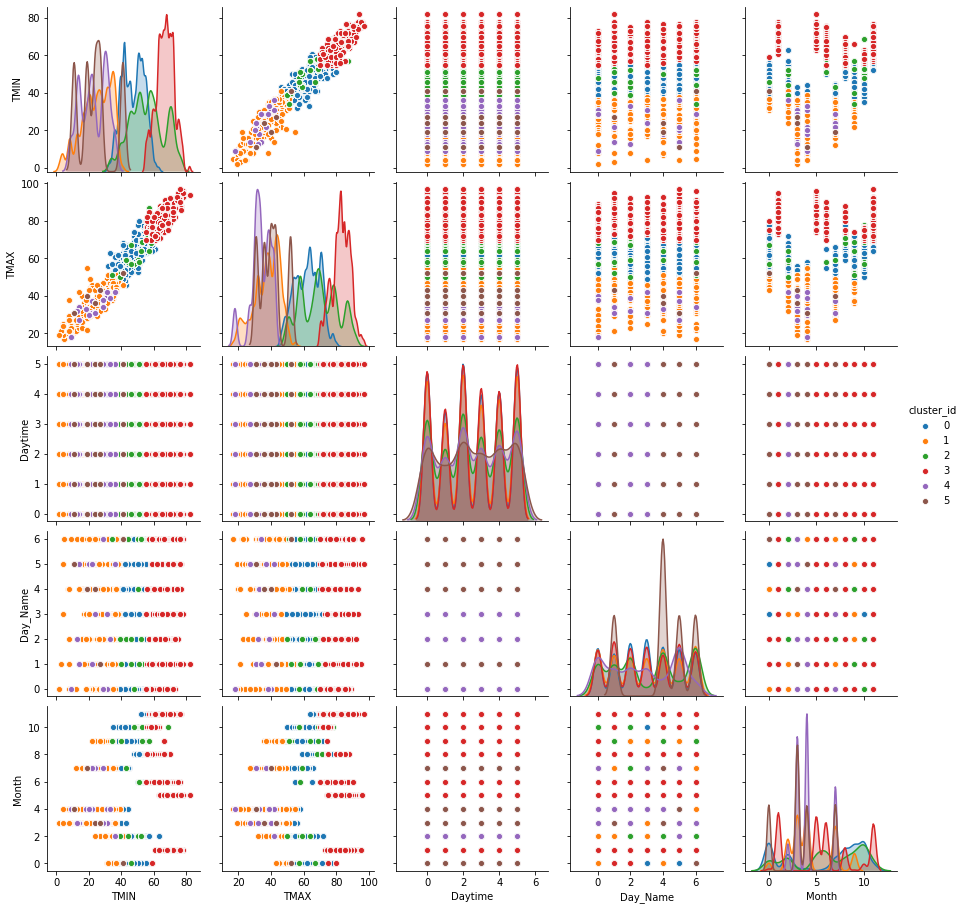

In [39]:
sns.pairplot(df_enc[['TMIN','TMAX','Daytime','Day_Name','Month','cluster_id']],hue='cluster_id')

## Summary

Below, we have used the data analyzed above to give meaning to the clusters identified.  This was done by looking at the mode of categorical data and the average of our continuous data by cluster along with visual representations from the pair plots above.

All clusters appear to primarily occur in the evening/night.

|Cluster id |Cluster Name | Description|
|:--------|:--------|:------------|
|Cluster 0| Fair Weather Fall Crimes | Occurs in Fall during the middle of the week in mild temperatures with little to no precipitation |
|Cluster 1 |Cold and Calm Crimes | Occurs in Fall during the middle of the week in mild temperatures with little to no precipitation |
|Cluster 2 |Fair Weather Spring Crimes | Occurs in Spring on the weekend in mild temperatures with little to no precipitation |
|Cluster 3 |Cold and Inclimate Weather Crimes | Occurs in Winter during the week in cooler temperatures with heavy precipitation |
|Cluster 4 |Hot and Dry Crimes | Occurs in the Summer during the week in warmer weather with little to no precipitation |
|Cluster 5 |Cold and Moderate Crimes | Occurs in Winter during the week in cooler weather with moderate precipitation |



<a id="App1ModEval2Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

Below, we calculate the silhouette score of our clusters.  The value closer to 1 between -1 and +1 indicates better clustering as measured by denseness and separability.  With a silhouette score of .54, it indicates it's not perfect clustering but we do have denseness and separability as can be seen in the above visualization.

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, cluster_label)

0.5359916545678038

<a id="App1Compare"></a>
<a href="#top">Back to Top</a>
## Approach 1 - Comparing Effectiveness of Method 1 and 2

When comparing the effectiveness based purely on the silhouette score as a metric, Method 2 resulted in a more optimal set of clusters.  

However, Method 1 was aimed at providing an explanation around the data utilized for the KNN model implemented in Lab 2.  Method 2 does give an indication of what types of days/time of days seem to be clustered together. Both Method 1 and 2 would have been useful to perform as part of EDA when implementing the model to begin with.

<a id="Approach2"></a>
<a href="#top">Back to Top</a>
# Approach 2

<a id="App2ModEval1"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 1

<a id="App2ModEval1DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

In this section of the analysis, we are measuring our ability to take the original dataset and create clusters based on attributes of the crime.  Through this effort, we hope to identify meaningful associations between crime types.

The original dataset has 1,048,575  observations with 24 columns.  We modified the time and date field to separate out time of day, day, weekday, month, season, and year.  
  
|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police |
|KY_CD|Categorical|	Three digit offense classification code|
|OFNS_DESC	|Categorical (string)|Description of offense corresponding with key code|
|PD_CD	|Categorical|Three digit internal classification code (more granular than Key Code)|
|PD_DESC|Categorical (string)|	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD|Categorical|	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD|Categorical|	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|Daytime|Categorical| Time of day binned into six sections|
|Day|Categorical|Day of Month (1-31)|
|Day_Name|Categorical|Day of Week Name|
|Month|Categorical|Month of Year Name|
|Season|Categorical|Grouping of season based on date|
|Year|Categorical|Year Number|

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab3_Individual_Files/Sabrina/FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.


In [9]:
crime.describe()

CMPLNT_NUM         KY_CD         PD_CD   ADDR_PCT_CD    X_COORD_CD  \
count  1.048575e+06  1.048575e+06  1.047842e+06  1.048574e+06  1.016158e+06   
mean   5.497027e+08  2.953382e+02  4.099135e+02  6.380729e+01  1.004983e+06   
std    2.598666e+08  1.505240e+02  2.192328e+02  3.434066e+01  2.146524e+04   
min    1.000007e+08  1.010000e+02  1.010000e+02  1.000000e+00  9.133190e+05   
25%    3.244583e+08  1.170000e+02  2.540000e+02  4.000000e+01  9.919982e+05   
50%    5.494480e+08  3.410000e+02  3.570000e+02  6.600000e+01  1.004598e+06   
75%    7.746526e+08  3.510000e+02  6.370000e+02  9.400000e+01  1.016552e+06   
max    9.999996e+08  8.810000e+02  9.750000e+02  1.230000e+02  1.067226e+06   

         Y_COORD_CD      Latitude     Longitude       Duration  \
count  1.016158e+06  1.016158e+06  1.016158e+06  842416.000000   
mean   2.067818e+05  4.073420e+01 -7.392516e+01       3.328113   
std    3.043238e+04  8.353300e-02  7.741049e-02       5.232735   
min    1.210800e+05  4.049877e+01 -7.425508e+01       0.000000   
25%    1.839220e+05  4.067144e+01 -7.397206e+01       1.000000   
50%    2.053300e+05  4.073021e+01 -7.392661e+01       1.000000   
75%    2.348090e+05  4.081116e+01 -7.388336e+01       2.000000   
max    2.718200e+05  4.091272e+01 -7.370058e+01      24.000000   

       Duration_to_PD           Day          Year       GeoCell     GeoCell_X  \
count    1.048510e+06  1.048510e+06  1.048510e+06  1.016123e+06  1.016157e+06   
mean     1.359763e+01  1.552258e+01  2.014346e+03  5.844382e+01  6.444581e+00   
std      2.331575e+02  8.803343e+00  8.898275e-01  2.079365e+01  1.441555e+00   
min     -2.410000e+02  1.000000e+00  1.910000e+03  1.000000e+00  1.000000e+00   
25%      0.000000e+00  8.000000e+00  2.014000e+03  4.600000e+01  6.000000e+00   
50%      0.000000e+00  1.500000e+01  2.014000e+03  5.600000e+01  6.000000e+00   
75%      1.000000e+00  2.300000e+01  2.015000e+03  7.600000e+01  7.000000e+00   
max      3.822300e+04  3.100000e+01  2.015000e+03  9.900000e+01  1.000000e+01   

          GeoCell_Y  
count  1.016124e+06  
mean   6.199925e+00  
std    2.031922e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    6.000000e+00  
75%    8.000000e+00  
max    1.000000e+01

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

Because the Geography based attributes may force clustering, we have decided to drop all location and borough specific attributes.

In [11]:
#drop Geocell and coordinate data
if 'Latitude' in crime:    
    del crime['Latitude'] 
if 'Longitude' in crime:    
    del crime['Longitude'] 
if 'Geocell' in crime:    
    del crime['Geocell'] 
if 'Geocell_X' in crime:    
    del crime['Geocell_X'] 
if 'Geocell_Y' in crime:    
    del crime['Geocell_Y'] 
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']
if 'BORO_NM' in crime:
    del crime['BORO_NM']

In [12]:
#grabbing a copy of the original dataset, post variable drop.  We need this to append the final labels back to
crime_df = crime

In [13]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='OFNS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='CRM_ATPT_CPTD_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='LAW_CAT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [14]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'OFNS_DESC' in crime:    
    del crime['OFNS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD'] # get rid of the original category as it is now one-hot encoded
if 'LAW_CAT_CD' in crime:    
    del crime['LAW_CAT_CD'] # get rid of the original category as it is now one-hot encoded


In [15]:
#checking the final transformation
pd.set_option('display.max_rows', 300)
crime.dtypes

CMPLNT_NUM                                      int64
CMPLNT_FR_DT                                   object
CMPLNT_FR_TM                                   object
CMPLNT_TO_DT                                   object
CMPLNT_TO_TM                                   object
RPT_DT                                         object
KY_CD                                           int64
PD_CD                                         float64
PD_DESC                                        object
PARKS_NM                                       object
HADEVELOPT                                     object
Lat_Lon                                        object
Start_Dt_Tm                                    object
End_Dt_Tm                                      object
Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                     

In [16]:
#dropping variables that don't add value or have sizeable missing values
if 'CMPLNT_NUM' in crime: #randomly assigned case id
    del crime['CMPLNT_NUM']
if 'CMPLNT_FR_DT' in crime:  #Date and time references have been binned
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']
if 'RPT_DT' in crime:   #this is an unknown at the time of the crime in many cases
    del crime['RPT_DT']
if 'PD_DESC' in crime:  #duplicate information from PD_CD
    del crime['PD_DESC']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'PARKS_NM' in crime:    
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:    
    del crime['HADEVELOPT']
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC']

Below, we drop rows with NA values and rename the dataframe as X for simplicity.

In [17]:
#dropping any remaining NANs
crime = crime.dropna() 

In [18]:
crime.isnull().values.any()
crime.isnull().sum().sum()

0

In [19]:
X = crime #renaming the dataframe for simplicity

<a id="App2ModEval1Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

In this model evaluation, we are deploying optimal K to inform our number of clusters below.  We see in the elbow plot below that we could argue using 2 or 4 in additon to 8 based solely on the plateau that immediately follow both.  We are working under the assumption that we will see a handful of "profiles" surface in this modeling effort, so we are going to use k=8.

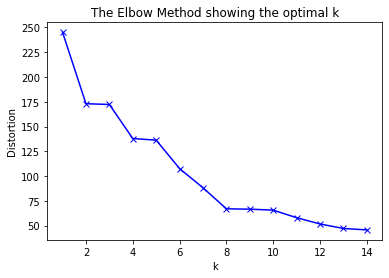

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
X1=crime

https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array  
Based on research above, we convert the dataframe to an array for the next set of manipulation.

In [23]:
import numpy as np
import pandas as pd

X1.to_numpy()

array([[344., 101.,   1., ...,   1.,   0.,   0.],
       [106., 109.,   1., ...,   1.,   0.,   0.],
       [118., 792.,   0., ...,   1.,   0.,   0.],
       ...,
       [344., 113.,   1., ...,   0.,   0.,   1.],
       [235., 511.,   1., ...,   0.,   0.,   1.],
       [236., 782.,   1., ...,   0.,   0.,   1.]])

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [25]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X1) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame - code below fails as a dataframe - needs to be array
#X_normalized = pd.DataFrame(X_normalized) 

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html  
We again determined that for this exercise, we will use n=8 for our number of clusters.  We are attempting to fit clusters using KMeans as our algorithm of choice.  
(https://scikit-learn.org/stable/tutorial/machine_learning_map/)

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

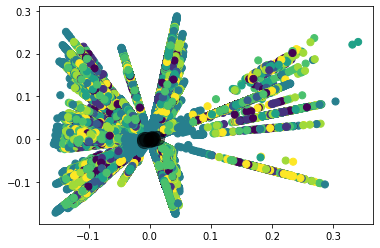

In [27]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

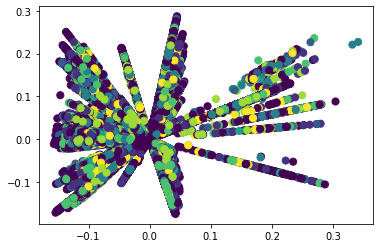

In [28]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X_normalized, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X_normalized.shape[0])[:n_clusters]
    centers = X_normalized[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_normalized, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X_normalized[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X_normalized, 8)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,
            s=50, cmap='viridis');

In [29]:
labels #validation that we got labels

array([3, 3, 3, ..., 5, 6, 6], dtype=int64)

In [30]:
#setting up the data to join back
df = pd.DataFrame(labels, columns = ["Cluster"])
print(df)

        Cluster
0             3
1             3
2             3
3             3
4             3
...         ...
817911        6
817912        6
817913        5
817914        6
817915        6

[817916 rows x 1 columns]


In [31]:
crime_df

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         101109527   12/31/2015     23:45:00          NaN          NaN   
1         153401121   12/31/2015     23:36:00          NaN          NaN   
2         569369778   12/31/2015     23:30:00          NaN          NaN   
3         968417082   12/31/2015     23:30:00          NaN          NaN   
4         641637920   12/31/2015     23:25:00   12/31/2015     23:30:00   
...             ...          ...          ...          ...          ...   
1048570   317154175    11/1/2013     20:30:00    11/1/2013     21:00:00   
1048571   833410354    11/1/2013     20:28:00    11/1/2013     20:31:00   
1048572   961949188    11/1/2013     20:25:00          NaN          NaN   
1048573   157608118    11/1/2013     20:25:00    11/1/2013     20:45:00   
1048574   176151924    11/1/2013     20:25:00    11/1/2013     20:30:00   

             RPT_DT  KY_CD                        OFNS_DESC  PD_CD  \
0        12/31/2015    113                          FORGERY  729.0   
1        12/31/2015    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   
2        12/31/2015    117                  DANGEROUS DRUGS  503.0   
3        12/31/2015    344     ASSAULT 3 & RELATED OFFENSES  101.0   
4        12/31/2015    344     ASSAULT 3 & RELATED OFFENSES  101.0   
...             ...    ...                              ...    ...   
1048570   11/1/2013    341                    PETIT LARCENY  338.0   
1048571   11/1/2013    344     ASSAULT 3 & RELATED OFFENSES  113.0   
1048572   11/1/2013    121   CRIMINAL MISCHIEF & RELATED OF  269.0   
1048573   11/1/2013    235                  DANGEROUS DRUGS  511.0   
1048574   11/1/2013    236                DANGEROUS WEAPONS  782.0   

                                PD_DESC  ... Duration_to_PD     Month   Day  \
0        FORGERY,ETC.,UNCLASSIFIED-FELO  ...            0.0  December  31.0   
1                                   NaN  ...            0.0  December  31.0   
2        CONTROLLED SUBSTANCE,INTENT TO  ...            0.0  December  31.0   
3                             ASSAULT 3  ...            0.0  December  31.0   
4                             ASSAULT 3  ...            0.0  December  31.0   
...                                 ...  ...            ...       ...   ...   
1048570  LARCENY,PETIT FROM BUILDING,UN  ...            0.0  November   1.0   
1048571           MENACING,UNCLASSIFIED  ...            0.0  November   1.0   
1048572  MISCHIEF,CRIMINAL,    UNCL 2ND  ...            0.0  November   1.0   
1048573  CONTROLLED SUBSTANCE, POSSESSI  ...            0.0  November   1.0   
1048574        WEAPONS, POSSESSION, ETC  ...            0.0  November   1.0   

           Year Duration_lbl  Season     Daytime GeoCell GeoCell_X GeoCell_Y  
0        2015.0          NaN  Winter  Late Night    77.0       7.0       8.0  
1        2015.0          NaN  Winter  Late Night    49.0       9.0       5.0  
2        2015.0          NaN  Winter  Late Night    76.0       6.0       8.0  
3        2015.0          NaN  Winter  Late Night    40.0      10.0       4.0  
4        2015.0        Short  Winter  Late Night    55.0       5.0       6.0  
...         ...          ...     ...         ...     ...       ...       ...  
1048570  2013.0        Short    Fall       Night    77.0       7.0       8.0  
1048571  2013.0        Short    Fall       Night    37.0       7.0       4.0  
1048572  2013.0          NaN    Fall       Night    55.0       5.0       6.0  
1048573  2013.0        Short    Fall       Night    97.0       7.0      10.0  
1048574  2013.0        Short    Fall       Night    76.0       6.0       8.0  

[1048575 rows x 33 columns]

In [33]:
#creating a new, labeled data dataframe
crime_labeled = df.join(crime_df)

crime_labeled.head()

Cluster  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0        3   101109527   12/31/2015     23:45:00          NaN          NaN   
1        3   153401121   12/31/2015     23:36:00          NaN          NaN   
2        3   569369778   12/31/2015     23:30:00          NaN          NaN   
3        3   968417082   12/31/2015     23:30:00          NaN          NaN   
4        3   641637920   12/31/2015     23:25:00   12/31/2015     23:30:00   

       RPT_DT  KY_CD                        OFNS_DESC  PD_CD  ...  \
0  12/31/2015    113                          FORGERY  729.0  ...   
1  12/31/2015    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN  ...   
2  12/31/2015    117                  DANGEROUS DRUGS  503.0  ...   
3  12/31/2015    344     ASSAULT 3 & RELATED OFFENSES  101.0  ...   
4  12/31/2015    344     ASSAULT 3 & RELATED OFFENSES  101.0  ...   

  Duration_to_PD     Month   Day    Year  Duration_lbl  Season     Daytime  \
0            0.0  December  31.0  2015.0           NaN  Winter  Late Night   
1            0.0  December  31.0  2015.0           NaN  Winter  Late Night   
2            0.0  December  31.0  2015.0           NaN  Winter  Late Night   
3            0.0  December  31.0  2015.0           NaN  Winter  Late Night   
4            0.0  December  31.0  2015.0         Short  Winter  Late Night   

  GeoCell GeoCell_X GeoCell_Y  
0    77.0       7.0       8.0  
1    49.0       9.0       5.0  
2    76.0       6.0       8.0  
3    40.0      10.0       4.0  
4    55.0       5.0       6.0  

[5 rows x 34 columns]

In [34]:
#drop Geocell and coordinate data - again - to ensure the data matches the clustered attributes only
if 'Latitude' in crime_labeled:    
    del crime_labeled['Latitude'] 
if 'Longitude' in crime_labeled:    
    del crime_labeled['Longitude'] 
if 'Geocell' in crime_labeled:    
    del crime_labeled['Geocell'] 
if 'Geocell_X' in crime_labeled:    
    del crime_labeled['Geocell_X'] 
if 'Geocell_Y' in crime_labeled:    
    del crime_labeled['Geocell_Y'] 
if 'X_COORD_CD' in crime_labeled:
    del crime_labeled['X_COORD_CD']
if 'Y_COORD_CD' in crime_labeled:
    del crime_labeled['Y_COORD_CD']
if 'BORO_NM' in crime_labeled:
    del crime_labeled['BORO_NM']

In [35]:
crime_labeled

Cluster  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0             3   101109527   12/31/2015     23:45:00          NaN   
1             3   153401121   12/31/2015     23:36:00          NaN   
2             3   569369778   12/31/2015     23:30:00          NaN   
3             3   968417082   12/31/2015     23:30:00          NaN   
4             3   641637920   12/31/2015     23:25:00   12/31/2015   
...         ...         ...          ...          ...          ...   
817911        6   517200908    4/26/2014     17:00:00          NaN   
817912        6   774189623    4/26/2014     16:30:00    4/26/2014   
817913        5   976601504    4/26/2014     16:00:00    4/26/2014   
817914        6   223260676    4/26/2014     15:30:00    4/29/2014   
817915        6   821981537    4/26/2014     15:20:00    4/27/2014   

       CMPLNT_TO_TM      RPT_DT  KY_CD                        OFNS_DESC  \
0               NaN  12/31/2015    113                          FORGERY   
1               NaN  12/31/2015    101  MURDER & NON-NEGL. MANSLAUGHTER   
2               NaN  12/31/2015    117                  DANGEROUS DRUGS   
3               NaN  12/31/2015    344     ASSAULT 3 & RELATED OFFENSES   
4          23:30:00  12/31/2015    344     ASSAULT 3 & RELATED OFFENSES   
...             ...         ...    ...                              ...   
817911          NaN   4/29/2014    105                          ROBBERY   
817912     18:30:00   4/29/2014    121   CRIMINAL MISCHIEF & RELATED OF   
817913     16:10:00   4/29/2014    578                    HARRASSMENT 2   
817914      8:10:00   4/29/2014    107                         BURGLARY   
817915     12:00:00   4/29/2014    109                    GRAND LARCENY   

        PD_CD  ... Duration_to_PD     Month   Day    Year  Duration_lbl  \
0       729.0  ...            0.0  December  31.0  2015.0           NaN   
1         NaN  ...            0.0  December  31.0  2015.0           NaN   
2       503.0  ...            0.0  December  31.0  2015.0           NaN   
3       101.0  ...            0.0  December  31.0  2015.0           NaN   
4       101.0  ...            0.0  December  31.0  2015.0         Short   
...       ...  ...            ...       ...   ...     ...           ...   
817911  397.0  ...            3.0     April  26.0  2014.0           NaN   
817912  269.0  ...            3.0     April  26.0  2014.0         Short   
817913  637.0  ...            3.0     April  26.0  2014.0         Short   
817914  213.0  ...            3.0     April  26.0  2014.0          Long   
817915  425.0  ...            3.0     April  26.0  2014.0          Long   

        Season     Daytime GeoCell GeoCell_X GeoCell_Y  
0       Winter  Late Night    77.0       7.0       8.0  
1       Winter  Late Night    49.0       9.0       5.0  
2       Winter  Late Night    76.0       6.0       8.0  
3       Winter  Late Night    40.0      10.0       4.0  
4       Winter  Late Night    55.0       5.0       6.0  
...        ...         ...     ...       ...       ...  
817911  Spring     Evening    78.0       8.0       8.0  
817912  Spring     Evening    35.0       5.0       4.0  
817913  Spring     Evening    68.0       8.0       7.0  
817914  Spring     Evening    65.0       5.0       7.0  
817915  Spring     Evening    57.0       7.0       6.0  

[817916 rows x 34 columns]

In [36]:
crime_labeled.to_csv('crime_labeled2.csv')

In [37]:
#try pairplots next
import seaborn 
import matplotlib.pyplot as plt 

In the pairplots, there are some distinctions uncovered.  Duration and Duration to PD present separation that we will investigate further.  Day of the week also shows subtle separation.  To really see this, we will have to take this data into a more manageable tool for the Data Scientist (Tableau).

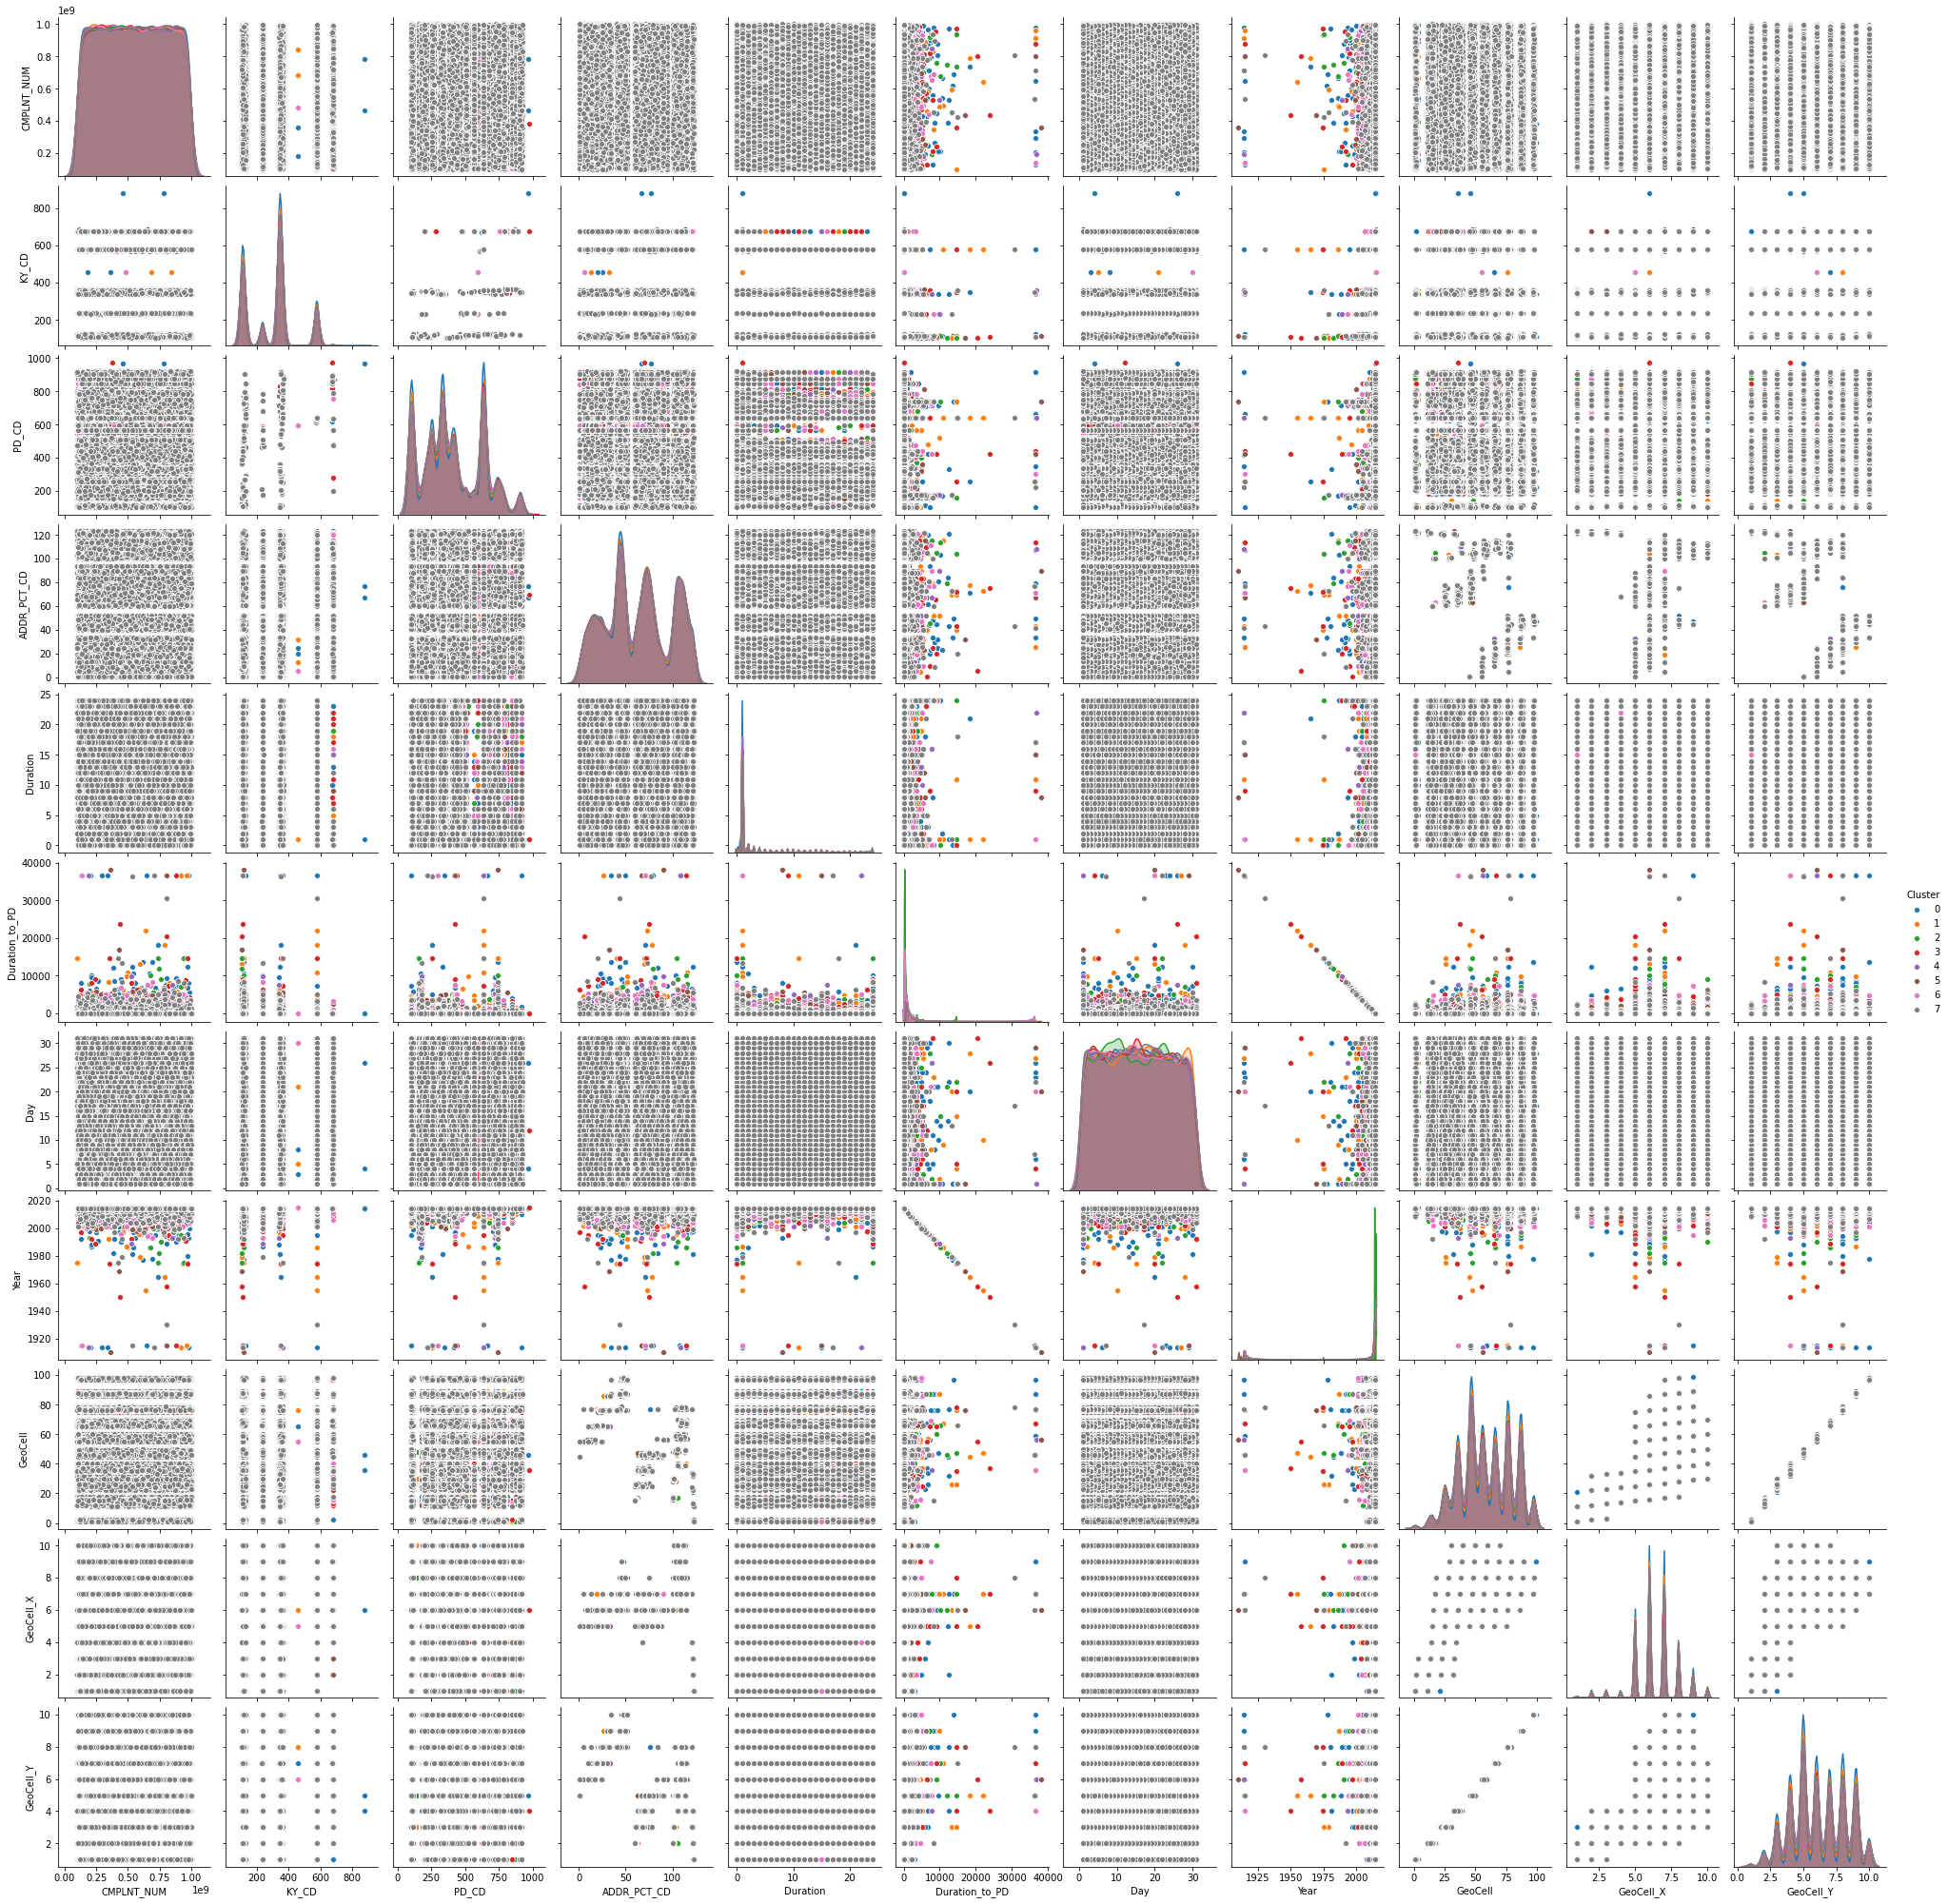

In [38]:
seaborn.pairplot(crime_labeled, hue ='Cluster') 
# to show 
plt.show()

In [39]:
#plot duration v duration to pd with cluster
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 159164 rows containing missing values.


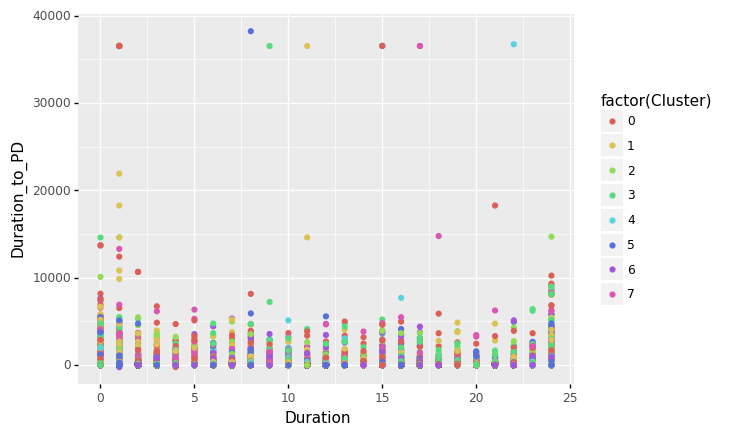

<ggplot: (120739349550)>

In [56]:
(ggplot(crime_labeled, aes('Duration', 'Duration_to_PD', color='factor(Cluster)'))
 + geom_point())

In looking for distinction, we pulled a statistical view of the means.

In [83]:
crime_labeled.groupby(['Cluster']).mean()

CMPLNT_NUM       KY_CD       PD_CD  ADDR_PCT_CD  Duration  \
Cluster                                                                
0        5.501502e+08  295.222713  407.674850    63.607023  3.397493   
1        5.486886e+08  296.002316  408.289357    63.639050  3.275408   
2        5.502050e+08  296.508195  406.678966    63.963598  3.346838   
3        5.493513e+08  296.982705  411.089052    63.494178  3.310411   
4        5.497551e+08  296.113826  408.524829    63.858351  3.369893   
5        5.514746e+08  298.036682  408.213908    63.798556  3.276666   
6        5.486690e+08  296.245253  408.083148    63.705727  3.298442   
7        5.506328e+08  296.107114  408.137397    63.791466  3.370843   

         Duration_to_PD        Day         Year    GeoCell  GeoCell_X  \
Cluster                                                                 
0             14.507423  15.613719  2014.551571  58.526401   6.442911   
1             13.285455  15.694738  2014.580375  58.485103   6.443459   
2             13.473805  15.560895  2014.491414  58.451924   6.448694   
3             14.021150  15.505404  2014.542610  58.427476   6.443817   
4             13.679342  15.517984  2014.556644  58.365458   6.439629   
5             12.568193  15.528237  2014.555997  58.381868   6.447105   
6             12.411613  15.533275  2014.559586  58.512253   6.446693   
7             12.776212  15.633849  2014.563234  58.486967   6.447634   

         GeoCell_Y  
Cluster             
0         6.208351  
1         6.204165  
2         6.200325  
3         6.198368  
4         6.192586  
5         6.193477  
6         6.206558  
7         6.203935

Additional Analysis was completed in Tableau ('Approach 2 Model 1')

The clusters created in this model ended up with a fair amount of overlapping items.  Because of this, we identified means, modes and variation that was distinct. You'll note that rather than identify the top 5 crimes, we identified the top 5 crimes that were the highest frequency proportionally to the cluster.  One modification we made to be able to drill into this finding was to remove any crime description that had less than 100 incidents overall.  Similary, each cluster has a timeframe of evening or night.  Because they are so similar, we drilled into smaller time ranges to layer in a bit more specificity. 

|Cluster|Custom Label|#Cases|AvgDuration|avgDurationtoPD|Month|DayOfWeek|TimeofDay|Top 5 Proportional Crimes|Top 5 Proportional Crimes|Top 5 Proportional Crimes|Top 5 Proportional Crimes|Top 5 Proportional Crimes|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|Interference	|241566	|3.397492766	|14.50742283|	August|	Wednesday|	5-6p	|TAMPERING 3,2, CRIMINAL|	GAMBLING, DEVICE, POSSESSION	|FIREWORKS, SALE	|ROBBERY,BANK	|TAMPERING 1,CRIMINAL|
|1|Simmering Angst |	129960|	3.275408491|	13.28545485	|October|	Thursday	|3-4p	|PROSTITUTION, PATRONIZING 4, 3	|ASSEMBLY,UNLAWFUL	|MAKING TERRORISTIC THREAT	|MARIJUANA, POSSESSION 1, 2 & 3	|AGGRAVATED CRIMINAL CONTEMPT|
|2 |Weekend Crimes of Opportunity	|61563	|3.346838005	|13.47380477	|August	|Saturday|	3p|	LARCENY,GRAND FROM TRUCK, UNATTENDED|	BAIL JUMPING 3	|ROBBERY,NECKCHAIN/JEWELRY	|CUSTODIAL INTERFERENCE 1	|BURGLARY,UNCLASSIFIED,DAY|
|3	|Illegal Selling and Taking|96789|	3.31041098	|14.02115019|	August|	Wednesday|	7p	|FIREWORKS, SALE	|AGRICULTURE & MARKETS LAW,UNCL	|LARCENY,GRAND BY IDENTITY THEFT-UNCLASSIFIED	|ROBBERY,ATM LOCATION|	CONTROLLED SUBSTANCE,SALE 1|
|4|Alcohol and Aggression	|44208	|3.369893316	|13.67934217	|August|	FRIDAY	|6p	|CHILD,ALCOHOL SALE TO	|ALCOHOLIC BEVERAGE CONTROL LAW	|ROBBERY,GAS STATION|	COERCION 1|	MENACING 1ST DEGREE (VICT NOT|
|5	|Under the Influence|74532|	3.276665835|	12.5681931	|July|	FRIDAY	|5-6p|	RECKLESS DRIVING|	ROBBERY,GAS STATION	|CONTROLLED SUBSTANCE,SALE 1	|PROSTITUTION, PATRONIZING 4, 3|	FALSE REPORT 1,FIRE|
|6|Robbery and Rioting|	73092	|3.298442304	|12.4116134	|July|	FRIDAY	|5-6p	|ROBBERY,PHARMACY|	ROBBERY,PUBLIC PLACE INSIDE	|RIOT 2/INCITING|	CUSTODIAL INTERFERENCE 1	|MENACING 1ST DEGREE (VICT PEAC|
|7	|Midweek Misdemeanors|96206	|3.370843429	|12.77621156	|May|	Wednesday|	8-9p	|ALCOHOLIC BEVERAGE CONTROL |LAW	FALSE REPORT 1,FIRE	|BURGLARY,UNKNOWN TIME|	RECKLESS ENDANGERMENT OF PROPE	|RIOT 2/INCITING|


<a id="App2ModEval1Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

As mentioned above, we are measuring effectiveness with the Silhouette score.  This model performance, as presented below, scored 0.043

In [77]:
from sklearn.metrics import silhouette_score
silhouette_score(X_normalized, labels)

0.04394667633186414

<a id="App2ModEval2"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 2

<a id="App2ModEval2DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

As mentioned prior, we want to go through our dataset and cleanse it of any location-based predictors. We also want to remove columns where we derived continuous variables from our categorical ones. Our belief is that including the same parameters where we derived new features would cause irregularities and bias in our clustering

In [67]:
#Python 3.7.2
#Import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Function to ignore scikit warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%config IPCompleter.greedy=True

#Read in Full Dataset
df = pd.read_csv("/Users/auriang/Documents/SMU_Data_Science/SMUGIT/ML1_LAB/NewYorkCityCrimes2015/Lab3_Individual_Files/Aurian/FE1_NYPD_Complaint_Data_Historic.csv")

In [140]:
#Print shapes
print(df.shape)

(1048575, 38)


Next let's check the data types and column headers to make sure everything aligns

In [141]:
#Check info and head
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   101109527   12/31/2015     23:45:00          NaN          NaN  12/31/2015   
1   153401121   12/31/2015     23:36:00          NaN          NaN  12/31/2015   
2   569369778   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
3   968417082   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
4   641637920   12/31/2015     23:25:00   12/31/2015     23:30:00  12/31/2015   

   KY_CD                        OFNS_DESC  PD_CD  \
0    113                          FORGERY  729.0   
1    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   
2    117                  DANGEROUS DRUGS  503.0   
3    344     ASSAULT 3 & RELATED OFFENSES  101.0   
4    344     ASSAULT 3 & RELATED OFFENSES  101.0   

                          PD_DESC  ... Duration_to_PD     Month   Day    Year  \
0  FORGERY,ETC.,UNCLASSIFIED-FELO  ...            0.0  December  31.0  2015.0   
1                             NaN  ...            0.0  December  31.0  2015.0   
2  CONTROLLED SUBSTANCE,INTENT TO  ...            0.0  December  31.0  2015.0   
3                       ASSAULT 3  ...            0.0  December  31.0  2015.0   
4                       ASSAULT 3  ...            0.0  December  31.0  2015.0   

   Duration_lbl  Season     Daytime GeoCell GeoCell_X  GeoCell_Y  
0           NaN  Winter  Late Night    77.0       7.0        8.0  
1           NaN  Winter  Late Night    49.0       9.0        5.0  
2           NaN  Winter  Late Night    76.0       6.0        8.0  
3           NaN  Winter  Late Night    40.0      10.0        4.0  
4         Short  Winter  Late Night    55.0       5.0        6.0  

[5 rows x 38 columns]

### Data Pre-Processing

#### Location-Based Features  
As described before, below are the location variables we are set to remove:  

|Variable Label|Variable Type|Data Description|  
| :-|:-|:-|  
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	|Categorical|The name of the borough in which the incident occurred|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD|Continuous|	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD|Continuous|	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude|Continuous|	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude|Continuous|	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|
|Lat_Lon|Categorical|	Latitude and Longitude coordinates tupled together as pairs|
|GeoCell|Categorical|	Grid system derived from using latitude and longitude coordinates to provide a generalized meaning to location for each record|
|GeoCell_X|Categorical|	X coordinate of the GeoCell grid system|
|GeoCell_Y|Categorical|	Y coordinate of the GeoCell grid system|

#### Remove Redundant Features
These features below are the ones used to feature engineer new, continuous predictors:  

|Variable Label|Variable Type|Data Description|  
| :-|:-|:-|  
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |  
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police | 

Here we are going to drop all the variables from the dataframe listed above to move forward with our clustering analysis.

In [214]:
#Drop variables
dropvars = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Lat_Lon','GeoCell','GeoCell_X','GeoCell_Y','CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM','RPT_DT']

#Create new df
clustdf = df.drop(columns = dropvars, axis = 1)

#Check data types to ensure right columns were removed
print(clustdf.info())
clustdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   KY_CD             1048575 non-null  int64  
 1   OFNS_DESC         1045695 non-null  object 
 2   PD_CD             1047842 non-null  float64
 3   PD_DESC           1047842 non-null  object 
 4   CRM_ATPT_CPTD_CD  1048574 non-null  object 
 5   LAW_CAT_CD        1048575 non-null  object 
 6   Start_Dt_Tm       1048510 non-null  object 
 7   End_Dt_Tm         842467 non-null   object 
 8   Day_Name          1048510 non-null  object 
 9   Duration          842416 non-null   float64
 10  Duration_to_PD    1048510 non-null  float64
 11  Month             1048510 non-null  object 
 12  Day               1048510 non-null  float64
 13  Year              1048510 non-null  float64
 14  Duration_lbl      790699 non-null   object 
 15  Season            1048510 non-null  object 
 16  

KY_CD                        OFNS_DESC  PD_CD  \
0    113                          FORGERY  729.0   
1    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   
2    117                  DANGEROUS DRUGS  503.0   
3    344     ASSAULT 3 & RELATED OFFENSES  101.0   
4    344     ASSAULT 3 & RELATED OFFENSES  101.0   

                          PD_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD  \
0  FORGERY,ETC.,UNCLASSIFIED-FELO        COMPLETED       FELONY   
1                             NaN        COMPLETED       FELONY   
2  CONTROLLED SUBSTANCE,INTENT TO        COMPLETED       FELONY   
3                       ASSAULT 3        COMPLETED  MISDEMEANOR   
4                       ASSAULT 3        COMPLETED  MISDEMEANOR   

           Start_Dt_Tm            End_Dt_Tm  Day_Name  Duration  \
0  12/31/2015 23:45:00                  NaN  Thursday       NaN   
1  12/31/2015 23:36:00                  NaN  Thursday       NaN   
2  12/31/2015 23:30:00                  NaN  Thursday       NaN   
3  12/31/2015 23:30:00                  NaN  Thursday       NaN   
4  12/31/2015 23:25:00  12/31/2015 23:30:00  Thursday       1.0   

   Duration_to_PD     Month   Day    Year Duration_lbl  Season     Daytime  
0             0.0  December  31.0  2015.0          NaN  Winter  Late Night  
1             0.0  December  31.0  2015.0          NaN  Winter  Late Night  
2             0.0  December  31.0  2015.0          NaN  Winter  Late Night  
3             0.0  December  31.0  2015.0          NaN  Winter  Late Night  
4             0.0  December  31.0  2015.0        Short  Winter  Late Night

After analyzing each data type, we found that PD_DESC, Start_Dt_Tm and End_Dt_Tm don't add enough value to be kept in our analysis. The main reason for this exclusion is that these start and end times have over 300k unique values which would cause the "curse of dimensionality" by creating a wide dataset that isn't capturing accurately what we are trying to prove with our clustering objective. Also, the PD_DESC is a more of a watered down version of OFNS_DESC_TYPE explaining the same type of findings.

In [215]:
#Drop start and end date times
dropvars = ['Start_Dt_Tm','End_Dt_Tm','PD_DESC']

#Create new df
clustdf.drop(columns = dropvars, inplace = True)

#Check new headings
clustdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   KY_CD             1048575 non-null  int64  
 1   OFNS_DESC         1045695 non-null  object 
 2   PD_CD             1047842 non-null  float64
 3   CRM_ATPT_CPTD_CD  1048574 non-null  object 
 4   LAW_CAT_CD        1048575 non-null  object 
 5   Day_Name          1048510 non-null  object 
 6   Duration          842416 non-null   float64
 7   Duration_to_PD    1048510 non-null  float64
 8   Month             1048510 non-null  object 
 9   Day               1048510 non-null  float64
 10  Year              1048510 non-null  float64
 11  Duration_lbl      790699 non-null   object 
 12  Season            1048510 non-null  object 
 13  Daytime           998700 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 112.0+ MB


#### Handling NA's
For this exercise, we are going to drop all NA's as a whole. The reason for this is because we have certain datafields that are suffering from data entry errors. For example, some crimes don't have an End_Dt_Tm because the crime was never solved or some crimes didn't have the correct description or PD location at the time it was reported. Lastly, after we remove our NA's, we will still have about 700k records which is more of a representable sample of the population as defined by the central limit theorem. With these assumptions, we are comfortable with dropping all NA's moving forward.

In [146]:
#Drop NA's
clustdf.dropna(inplace = True)
clustdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750345 entries, 4 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   KY_CD             750345 non-null  int64  
 1   OFNS_DESC         750345 non-null  object 
 2   PD_CD             750345 non-null  float64
 3   CRM_ATPT_CPTD_CD  750345 non-null  object 
 4   LAW_CAT_CD        750345 non-null  object 
 5   Day_Name          750345 non-null  object 
 6   Duration          750345 non-null  float64
 7   Duration_to_PD    750345 non-null  float64
 8   Month             750345 non-null  object 
 9   Day               750345 non-null  float64
 10  Year              750345 non-null  float64
 11  Duration_lbl      750345 non-null  object 
 12  Season            750345 non-null  object 
 13  Daytime           750345 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 85.9+ MB


#### One Hot Encode Variables
Next we will one hot encode are categorical variables to change them into numerics. The reason for doing this is to add some dimensionality or "wideness" to our dataset for clustering as well as respecting the integrity of Euclidean distances used to calculate the algorithm.  

The variables set for one hot enconding:  
- OFNS_DESC  
- CRM_ATPT_CPTD_CD  
- LAW_CAT_CD  
- Day_Name  
- Month  
- Duration_lbl  
- Season  
- Daytime  

In [147]:
#Segment out categoricals
cat_col = ['OFNS_DESC','CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'Day_Name', 'Month', 'Duration_lbl', 'Season', 'Daytime']

#Create dummies
for var in cat_col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(clustdf[var], prefix=var)
    clustdf1=clustdf.join(cat_list)
    clustdf=clustdf1
    
cat_col = ['OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'Day_Name', 'Month', 'Duration_lbl', 'Season', 'Daytime']
data_vars=clustdf.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_col]

#Create new df with new vars
clustdf = clustdf[to_keep]
clustdf.columns.values

array(['KY_CD', 'PD_CD', 'Duration', 'Duration_to_PD', 'Day', 'Year',
       'OFNS_DESC_ABORTION', 'OFNS_DESC_ADMINISTRATIVE CODE',
       'OFNS_DESC_ADMINISTRATIVE CODES',
       'OFNS_DESC_AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OFNS_DESC_ALCOHOLIC BEVERAGE CONTROL LAW',
       'OFNS_DESC_ANTICIPATORY OFFENSES', 'OFNS_DESC_ARSON',
       'OFNS_DESC_ASSAULT 3 & RELATED OFFENSES',
       "OFNS_DESC_BURGLAR'S TOOLS", 'OFNS_DESC_BURGLARY',
       'OFNS_DESC_CHILD ABANDONMENT/NON SUPPORT',
       'OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF',
       'OFNS_DESC_CRIMINAL TRESPASS', 'OFNS_DESC_DANGEROUS DRUGS',
       'OFNS_DESC_DANGEROUS WEAPONS', 'OFNS_DESC_DISORDERLY CONDUCT',
       'OFNS_DESC_DISRUPTION OF A RELIGIOUS SERV',
       'OFNS_DESC_ENDAN WELFARE INCOMP', 'OFNS_DESC_ESCAPE 3',
       'OFNS_DESC_FELONY ASSAULT', 'OFNS_DESC_FORGERY',
       'OFNS_DESC_FRAUDS', 'OFNS_DESC_FRAUDULENT ACCOSTING',
       'OFNS_DESC_GAMBLING', 'OFNS_DESC_GRAND LARCENY',
       'OFNS_DESC_GRAND LA

#### Scaling Continuous Variables  
Now we are going to scale the appropriate continuous variables. We are going to omit from scaling day, year, KY_CD and PD_CD.  

The variables set to be scaled:  
- Duration  
- Duration_to_PD  

In [119]:
from sklearn.preprocessing import StandardScaler

#Columns to scale
scale_col = ['Duration', 'Duration_to_PD']

#Set scalar object
scaler = StandardScaler()

#Scale the vars and refit back into DF
clustdf[scale_col] = scaler.fit_transform(clustdf[scale_col])

#Check df head to make sure variables scaled properly
clustdf.head()

KY_CD     PD_CD  Duration  Duration_to_PD       Day      Year  \
4   0.345373 -1.397145  -0.47009       -0.042832  1.754208  0.757124   
5  -1.243653 -1.359833  -0.47009       -0.042832  1.754208  0.757124   
8   0.345373 -1.397145  -0.47009       -0.042832  1.754208  0.757124   
10  0.325343 -0.268483  -0.47009       -0.042832  1.754208  0.757124   
11  0.325343 -0.291802  -0.47009       -0.042832  1.754208  0.757124   

    OFNS_DESC_ABORTION  OFNS_DESC_ADMINISTRATIVE CODE  \
4                    0                              0   
5                    0                              0   
8                    0                              0   
10                   0                              0   
11                   0                              0   

    OFNS_DESC_ADMINISTRATIVE CODES  \
4                                0   
5                                0   
8                                0   
10                               0   
11                               0   

    OFNS_DESC_AGRICULTURE & MRKTS LAW-UNCLASSIFIED  ...  Season_Fall  \
4                                                0  ...            0   
5                                                0  ...            0   
8                                                0  ...            0   
10                                               0  ...            0   
11                                               0  ...            0   

    Season_Spring  Season_Summer  Season_Winter  Daytime_Day  \
4               0              0              1            0   
5               0              0              1            0   
8               0              0              1            0   
10              0              0              1            0   
11              0              0              1            0   

    Daytime_Early Morning  Daytime_Evening  Daytime_Late Night  \
4                       0                0                   1   
5                       0                0                   1   
8                       0                0                   1   
10                      0                0                   1   
11                      0                0                   1   

    Daytime_Morning  Daytime_Night  
4                 0              0  
5                 0              0  
8                 0              0  
10                0              0  
11                0              0  

[5 rows x 107 columns]

Now we are going to take a sample subset of the full dataset to perform the clustering algorithm on. The reason for this is because the computation time needed to run a clustering algorithm on this entire data set would take days. To deal with computation time, we are going to take a subset sample of the dataframe to use with over 35k records. Once again, the central limit theorem states that we can use that subset sample as a representative sample of the overall population.

In [148]:
#Create sample subset
sampledf = clustdf.sample(frac = 0.05).reset_index(drop=True)
print(sampledf.info())
sampledf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Columns: 107 entries, KY_CD to Daytime_Night
dtypes: float64(5), int64(1), uint8(101)
memory usage: 5.3 MB
None


KY_CD  PD_CD  Duration  Duration_to_PD   Day    Year  OFNS_DESC_ABORTION  \
0    341  333.0       2.0             0.0  27.0  2014.0                   0   
1    351  259.0       1.0             0.0   8.0  2014.0                   0   
2    341  343.0       1.0             0.0  26.0  2013.0                   0   
3    235  567.0       1.0             0.0  14.0  2014.0                   0   
4    361  639.0      21.0             1.0   9.0  2014.0                   0   

   OFNS_DESC_ADMINISTRATIVE CODE  OFNS_DESC_ADMINISTRATIVE CODES  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   OFNS_DESC_AGRICULTURE & MRKTS LAW-UNCLASSIFIED  ...  Season_Fall  \
0                                               0  ...            0   
1                                               0  ...            0   
2                                               0  ...            1   
3                                               0  ...            1   
4                                               0  ...            0   

   Season_Spring  Season_Summer  Season_Winter  Daytime_Day  \
0              1              0              0            1   
1              0              0              1            0   
2              0              0              0            1   
3              0              0              0            0   
4              0              0              1            0   

   Daytime_Early Morning  Daytime_Evening  Daytime_Late Night  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                1                   0   

   Daytime_Morning  Daytime_Night  
0                0              0  
1                1              0  
2                0              0  
3                0              1  
4                0              0  

[5 rows x 107 columns]

<a id="App2ModEval2Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

In [171]:
#Clustering
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#Set your cluster variables
X = sampledf.to_numpy()

#Scale your variables now
scaler = StandardScaler()
X = scaler.fit_transform(X)

We are running the elbow method as our method of inspection to find the optimal K level for both init = 'k-means++' and 'random'. Then we are going to assess the effectiveness of their respected silhouette scores.  

Below is our K-means++ fit and elbow plot. We see that the number of clusters = 8 seems like the optimal threshold.

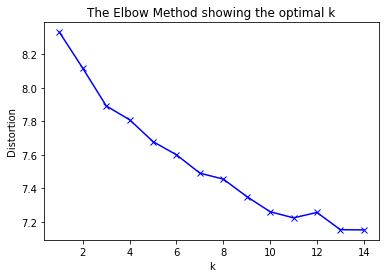

In [160]:
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Below, we performed Kmeans clustering using 'random' to find the optimal k for comparison.  We later compare the two methods using the silhouette score to determine the better of the two.

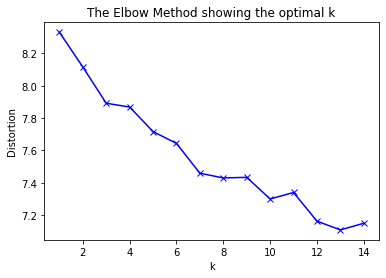

In [161]:
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'random').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<a id="App2ModEval2Effectiveness"></a>
<a href="#top">Back to Top</a>

### Measuring Effectiveness  

As stated earlier, we are using Silhouette scores to measures effectiveness of which model to use after we find the optimal n_clusters threshold. The scores are calculated between -1 and +1. A score close to +1 means that the sample is matched well to its own cluster and is poorly matched to its neighboring clusters. When we compare the init = kmeans++ and random methods, we will observe which silhouette score is the highest according to their optimum n_clusters threshold found in the previous step.

Since n = 8 for the number of clusters is the optimal threshold for both init methods, we will calculate the silhouette score of both respected models to see which one has the greater score.

In [173]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#fit with kmeans and n=8
cls = KMeans(n_clusters=8, init='k-means++')
cls.fit(X)

#get cluster labels
cluster_label = cls.labels_

print('K-means++ Silhouette Score: ')
print(silhouette_score(X, cluster_label))

#fit with kmeans and n=8
cls = KMeans(n_clusters=8, init='random')
cls.fit(X)

#get cluster labels
cluster_label = cls.labels_

print('Random Silhouette Score: ')
print(silhouette_score(X, cluster_label))

K-means++ Silhouette Score: 
0.0746209244122875
Random Silhouette Score: 
0.0779494468027496


We can move forward with the Random method as our overall clustering model for this data. It is important to note that a Silhouette score near 0 indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.  

Next we will plot our clusters with their associated prediction bounds.

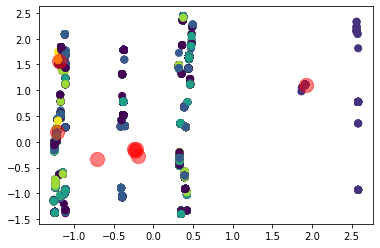

In [176]:
from sklearn.cluster import KMeans

#Use the random cls class to now predict
pred = cls.predict(X)

#Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50, cmap='viridis')
centers = cls.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

We can visually confirm why the Silhouette score is being pulled towards 0. We can see the cluster centers denoted in red are being placed in between multiple data points as well as having the cluster centers stacked on top of each other. This would explain some overlapping within neighboring clusters.  

We will go ahead and move forward to see if we can derive any interpretation from our analysis

In [181]:
#get cluster labels
df_cluster_labels = pd.DataFrame(cluster_label, columns=['cluster_id'])

#Concatenate with original sample df
df_withLabs = pd.concat([sampledf,df_cluster_labels],axis=1)

#Check head
df_withLabs.head()

KY_CD  PD_CD  Duration  Duration_to_PD   Day    Year  OFNS_DESC_ABORTION  \
0    341  333.0       2.0             0.0  27.0  2014.0                   0   
1    351  259.0       1.0             0.0   8.0  2014.0                   0   
2    341  343.0       1.0             0.0  26.0  2013.0                   0   
3    235  567.0       1.0             0.0  14.0  2014.0                   0   
4    361  639.0      21.0             1.0   9.0  2014.0                   0   

   OFNS_DESC_ADMINISTRATIVE CODE  OFNS_DESC_ADMINISTRATIVE CODES  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   OFNS_DESC_AGRICULTURE & MRKTS LAW-UNCLASSIFIED  ...  Season_Spring  \
0                                               0  ...              1   
1                                               0  ...              0   
2                                               0  ...              0   
3                                               0  ...              0   
4                                               0  ...              0   

   Season_Summer  Season_Winter  Daytime_Day  Daytime_Early Morning  \
0              0              0            1                      0   
1              0              1            0                      0   
2              0              0            1                      0   
3              0              0            0                      0   
4              0              1            0                      0   

   Daytime_Evening  Daytime_Late Night  Daytime_Morning  Daytime_Night  \
0                0                   0                0              0   
1                0                   0                1              0   
2                0                   0                0              0   
3                0                   0                0              1   
4                1                   0                0              0   

   cluster_id  
0           0  
1           0  
2           4  
3           4  
4           6  

[5 rows x 108 columns]

In [213]:
#Drop all headers that have 0.0 across the columns.
df_mode = df_withLabs.groupby(['cluster_id']).apply(pd.DataFrame.mode).reset_index(drop=True)
df_mode.dropna(inplace = True)
df_mode.loc[:, (df_mode != 0).any(axis=0)].reset_index(drop=True)

KY_CD  PD_CD  Duration  Duration_to_PD   Day    Year  \
0  341.0  101.0       1.0             0.0   1.0  2014.0   
1  578.0  638.0       1.0             0.0   2.0  2014.0   
2  341.0  101.0       1.0             0.0   1.0  2014.0   
3  110.0  441.0       1.0             1.0  25.0  2015.0   
4  341.0  101.0       1.0             0.0   8.0  2014.0   
5  105.0  109.0       1.0             0.0  14.0  2014.0   
6  341.0  254.0       8.0             1.0   1.0  2014.0   
7  112.0  739.0       1.0             0.0   1.0  2014.0   

   OFNS_DESC_GRAND LARCENY OF MOTOR VEHICLE  OFNS_DESC_HARRASSMENT 2  \
0                                       0.0                      0.0   
1                                       0.0                      1.0   
2                                       0.0                      0.0   
3                                       1.0                      0.0   
4                                       0.0                      0.0   
5                                       0.0                      0.0   
6                                       0.0                      0.0   
7                                       0.0                      0.0   

   OFNS_DESC_THEFT-FRAUD  CRM_ATPT_CPTD_CD_ATTEMPTED  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   
5                    0.0                         1.0   
6                    0.0                         0.0   
7                    1.0                         0.0   

   CRM_ATPT_CPTD_CD_COMPLETED  LAW_CAT_CD_FELONY  LAW_CAT_CD_MISDEMEANOR  \
0                         1.0                0.0                     1.0   
1                         1.0                0.0                     0.0   
2                         1.0                0.0                     1.0   
3                         1.0                1.0                     0.0   
4                         1.0                0.0                     1.0   
5                         0.0                1.0                     0.0   
6                         1.0                0.0                     1.0   
7                         1.0                1.0                     0.0   

   LAW_CAT_CD_VIOLATION  Duration_lbl_Medium  Duration_lbl_Short  Season_Fall  \
0                   0.0                  0.0                 1.0          0.0   
1                   1.0                  0.0                 1.0          0.0   
2                   0.0                  0.0                 1.0          0.0   
3                   0.0                  0.0                 0.0          0.0   
4                   0.0                  0.0                 1.0          1.0   
5                   0.0                  0.0                 1.0          0.0   
6                   0.0                  1.0                 0.0          0.0   
7                   0.0                  0.0                 1.0          0.0   

   Season_Summer  Season_Winter  cluster_id  
0            0.0            1.0         0.0  
1            0.0            0.0         1.0  
2            1.0            0.0         2.0  
3            0.0            0.0         3.0  
4            0.0            0.0         4.0  
5            0.0            0.0         5.0  
6            0.0            0.0         6.0  
7            0.0            0.0         7.0

## Summary

Below, we have used the data analyzed above to give meaning to the clusters identified.

All clusters appear to primarily occur in 2014 across all seasons. Most occur during the beiginning of the day encompassing fraud, theft, and robberies

|Cluster id |Cluster Name | Description|
|:--------|:--------|:------------|
|Cluster 0,2,4,6 | 1st Week Quick Larceny| Occurs in the first week of the month. Petit Larceny or petty theft crimes under 500 dollars. Occurs in all seasons |
|Cluster 1 |Petit Harrassment Violations | This cluster captures short lived harrassment violations that are typically nonviolent in nature|
|Cluster 3 |End of Month Joy Ride | Captures end of month grand larceny crimes considered to be a Felony |
|Cluster 5 |Mid-Month Robberies | Occurs in the middle of the month and tend to be short, successful felony robberies |
|Cluster 7 |Fraud and Out | Encompasses quick fradulent crimes that happen during the beginning of the month |

<a id="App2Compare"></a>
<a href="#top">Back to Top</a>
## Approach 2 - Comparing Effectiveness of Method 1 and 2

Approach 2 had mixed results.  Both Methods 1 and 2 had fairly weak silhouette scores.  Due to the nature of the dataset and large number of features used for Approach 2, both methods were computationally expensive.  

The value in this approach is primarily the value obtained through EDA.  For example, the clusters were difficult to separate, but what was visually evident were observations that were outliers which was helpful in understanding particular observations that were anomalous.

Ultimately, both methods are not of the quality that we would share with a client such that they can take action from our findings.

<a id="Deploy"></a>
<a href="#top">Back to Top</a>
# Deployment

To recap, we had two approaches for this analysis

Approach 2: Cluster based on attributes of the crime incidents to analyze crime profiles.
- We do not recommend using either of the findings from Approach 2 because of the following:
1. From both Method 1 and Method 2, the clusters were not dense or separable.
2. For the clusters we did identify, the differentiating analysis is not conclusive enough to drive insightful action.

Approach 1: Start with an aggregated version of the data to get count of crimes per day and 1) Cluster based on number of crimes per day, as well as various factors that could affect this number, and 2) cluster only using the aggregated crime conditions (not crimes per day)
- Method 1:  We do not recommend using Approach 1 Method 1 as the clusters were not dense or separable.
- Method 2:  We would recommend Approach 1 Method 2 based on the following factors:
1. The silhouette score for the clusters is 0.54 and has visual separation and fairly dense clusters.
2. The visualizations from the pair plots indicates obvious separability between clusters, especially in terms of Min and Max temperatures as well as Months. 

#### How useful is your model for interested parties?
- We can use this to recommend policing to be alerted to the fact that time and weather can be factors in crime conditions.

#### How would you deploy the model for interested parties?
- The deployment of the model would consist of sharing the analysis as a static file.  However, there could be some automation built around this approach to allow an updated view of the analysis if so desired.

#### What other data should be collect?
- By having more information about the weather included in the analysis up front, we could possibly have richer meaning/explanations about the clusters (and possibly better clustering).  In the output, we could include a seven day forcast for the weather. 

#### How often would the model need to be updated?
- Given the data depends largely on monthly and seasonal data, the model wouldn't need to be updated any more frequently than quarterly.



<a id="Exceptional"></a>
<a href="#top">Back to Top</a>

# Exceptional Work

We have included multiple methods for two distinct approaches above to illustrate exceptional work.  This robust approach to the lab has enabled us to compare and contrast different approaches to ensure our final recommendation is well justified.  
    
    
Our clusters aren't bad  
Hope it's worth 10 Mister Brad  
ML1 was rad  